# Plot Occupancy Estimation
This note is to plot occupancy estimation.

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import os
import glob
import pandas as pd
import numpy as np
import math
from scipy.stats import mode

In [2]:
def subplot_estimated_occupancy(occupancy_whole, occupancy_core, occupancy_margin, fig_info):
    """
    Plot and save estimated occupancy in Three Interest Area.
    Args:
        occupancy_whole (pd.DataFrame): occupancy in Whole Interest Area
        occupancy_core (pd.DataFrame): occupancy in Core Interest Area
        occupancy_margin (pd.DataFrame): occupancy in Margin Interest Area
        fig_info (string): infomation for save figure and display title
    """
    ymin = 0
    ymax = 20
    ystep = 4
    lw=1
    
    fig = plt.figure(fig_info)
    info, _ = fig_info.split('_processed_occupancy_')
    st = fig.suptitle('{}'.format(info), fontsize="x-large")
    
    # Whole Interest Area
    plt.subplot(3, 1, 1)
    plt.plot(occupancy_whole['Time']/1000, occupancy_whole['Occupancy'], 'b-', lw, alpha=0.6)
    plt.xlabel('time/second')
    plt.ylabel('# of visitors')
    plt.ylim(ymin, ymax)
    plt.yticks(np.arange(ymin,ymax,ystep))
    plt.title('Estimated # of visitors in Whole Interest Area')
    plt.grid(True, linestyle=':')

    # Core Interest Area
    plt.subplot(3, 1, 2)
    plt.plot(occupancy_core['Time']/1000, occupancy_core['Occupancy'], 'r-', lw, alpha=0.6)
    plt.xlabel('time/second')
    plt.ylabel('# of visitors')
    plt.ylim(ymin, ymax)
    plt.yticks(np.arange(ymin,ymax,ystep))
    plt.title('Estimated # of visitors in Core Interest Area')
    plt.grid(True, linestyle=':')

    # Margin Interest Area
    plt.subplot(3, 1, 3)
    plt.plot(occupancy_margin['Time']/1000, occupancy_margin['Occupancy'], 'g-', lw, alpha=0.6)
    plt.xlabel('time/second')
    plt.ylabel('# of visitors')
    plt.ylim(ymin, ymax)
    plt.yticks(np.arange(ymin,ymax,ystep))
    plt.title('Estimated # of visitors in Margin Interest Area')
    plt.grid(True, linestyle=':')

    plt.tight_layout()
    # shift subplots down:
    st.set_y(0.95)
    fig.subplots_adjust(top=0.85)
    plt.show()
    #plt.savefig('{}.png'.format(fig_info), dpi = 300)

In [3]:
occupancy_dir_camera1 = 'occupancy_estimation_camera1_combined'
occupancy_subdir_camera1 = [sub_dir for sub_dir in os.listdir(occupancy_dir_camera1) if not sub_dir.startswith('.')]
occupancy_subdir_camera1.sort(reverse = False)

occupancy_dir_camera2 = 'occupancy_estimation_camera2_combined'
occupancy_subdir_camera2 = [sub_dir for sub_dir in os.listdir(occupancy_dir_camera2) if not sub_dir.startswith('.')]
occupancy_subdir_camera2.sort(reverse = False)

##  Without Smooth
### Camera1

<IPython.core.display.Javascript object>


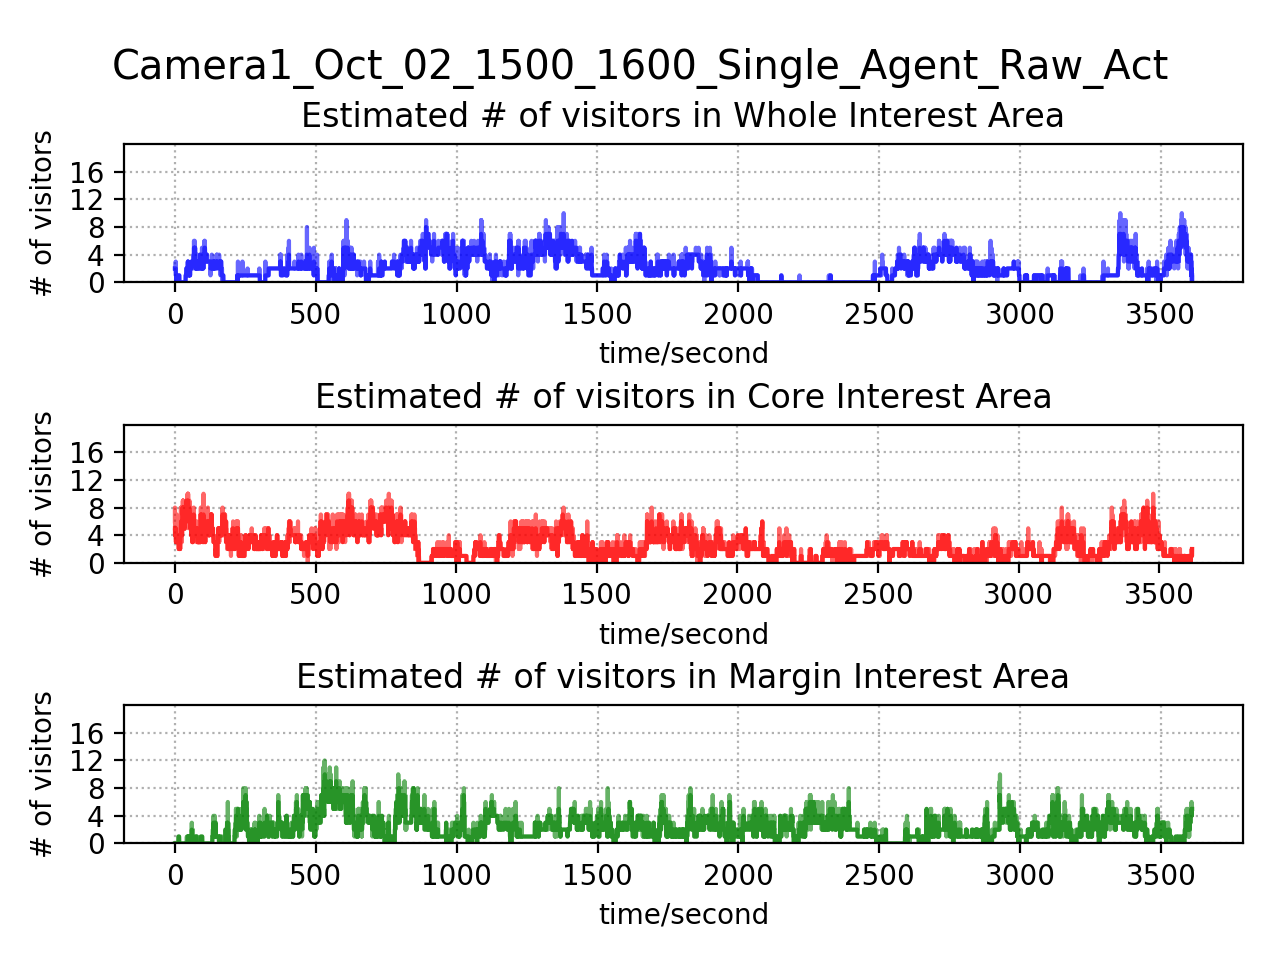

<IPython.core.display.Javascript object>


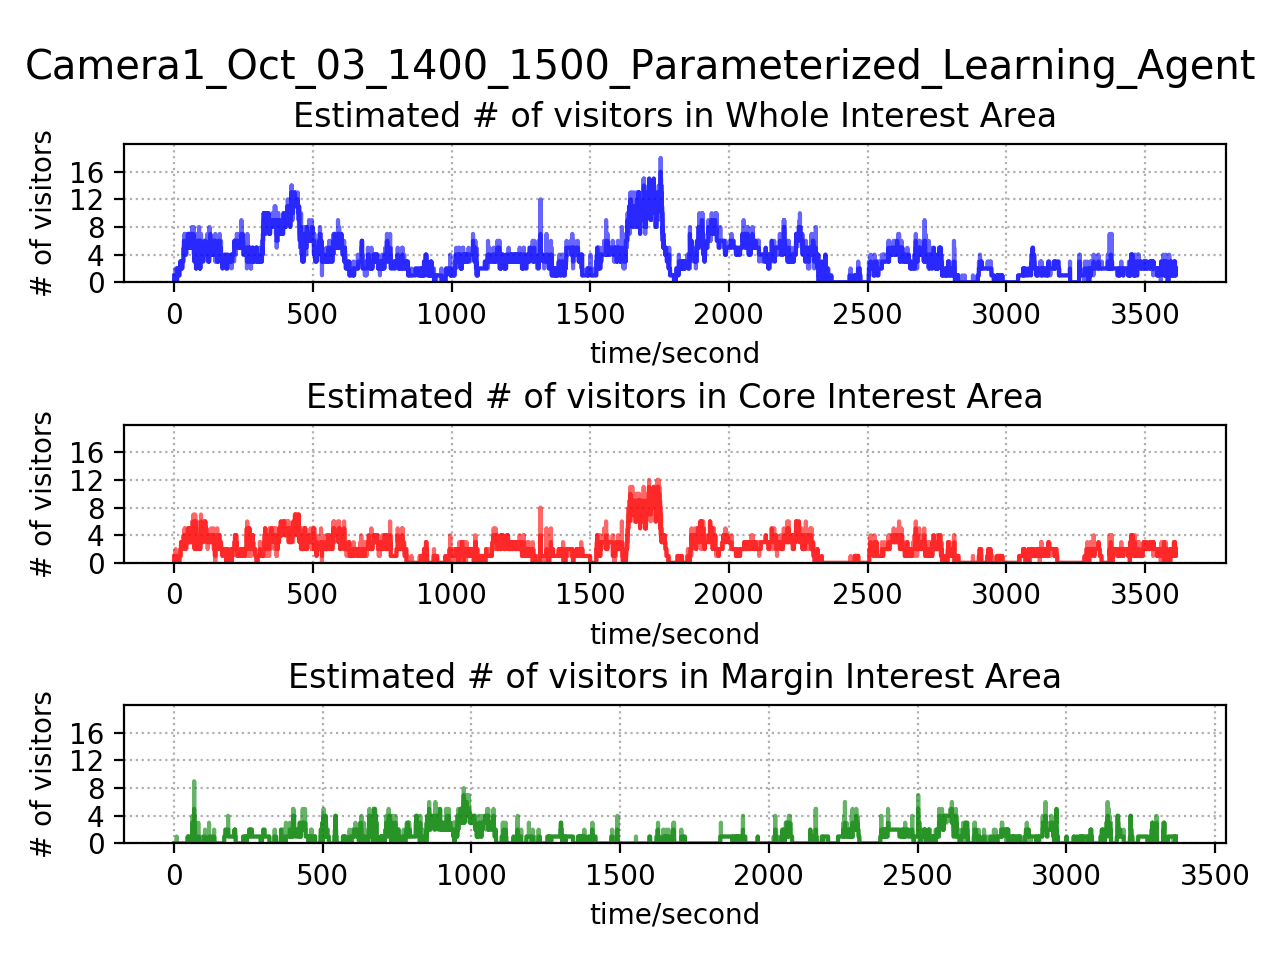

<IPython.core.display.Javascript object>


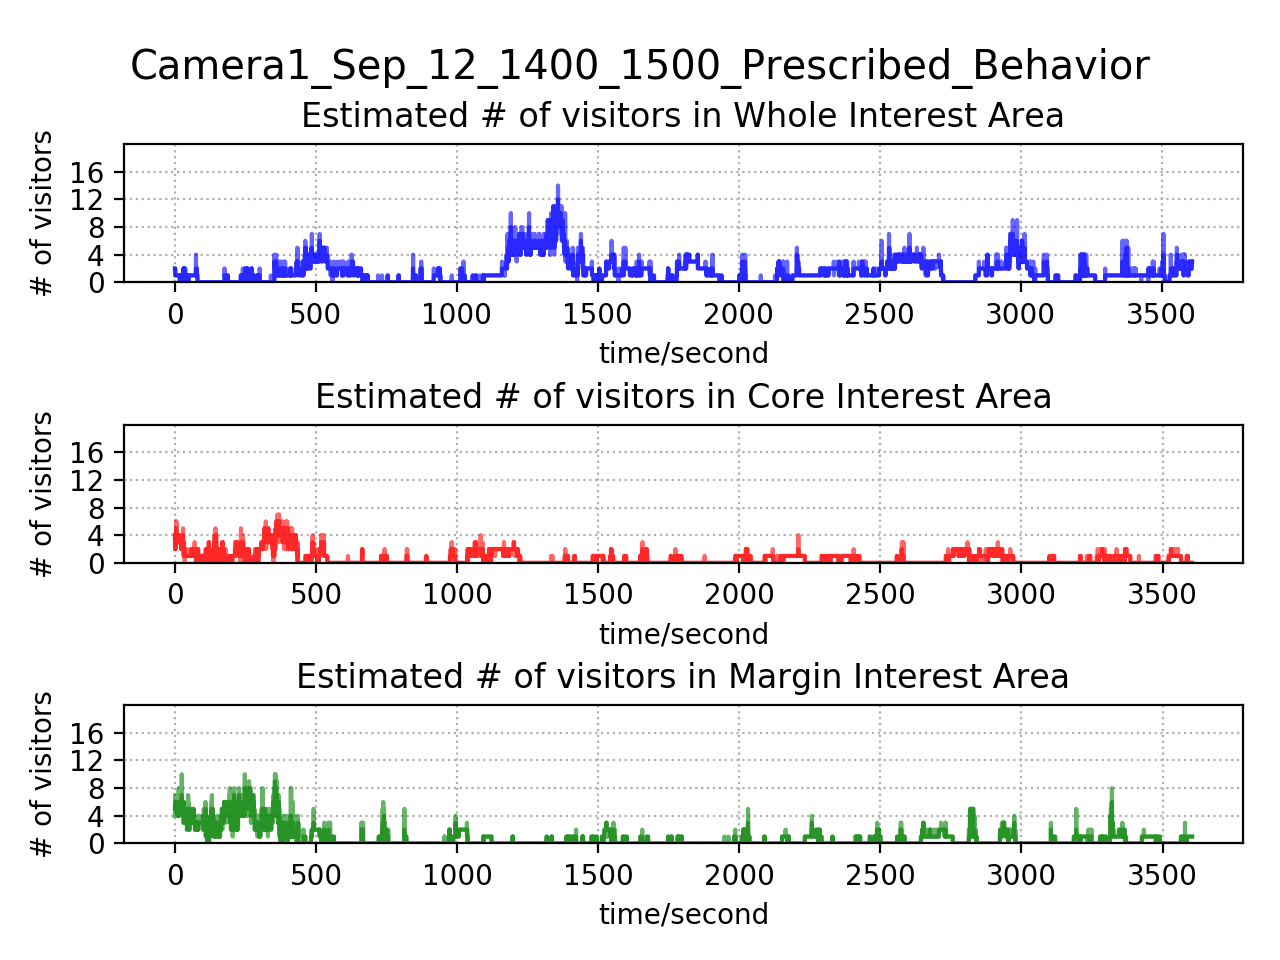

<IPython.core.display.Javascript object>


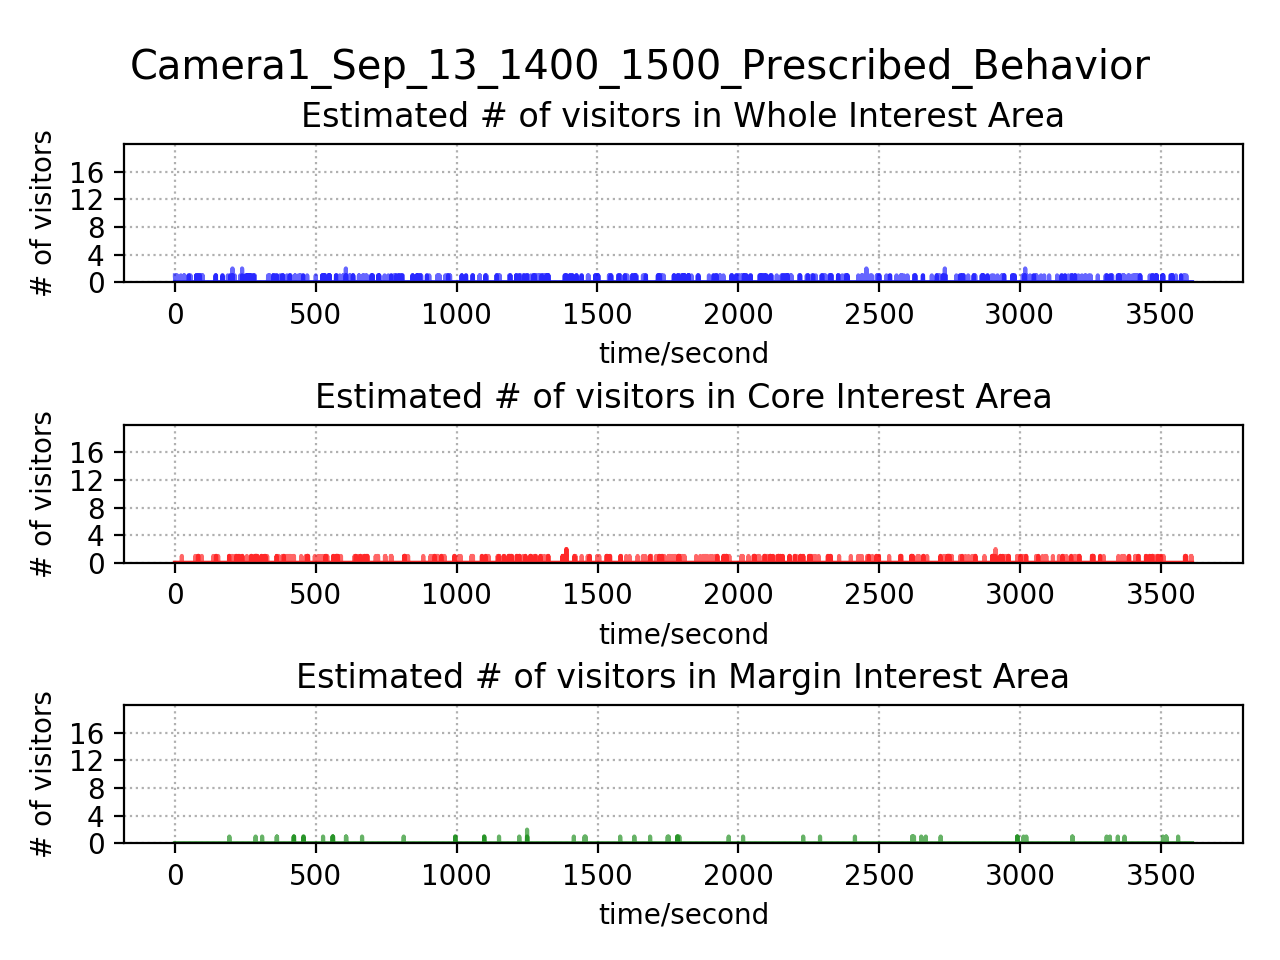

<IPython.core.display.Javascript object>


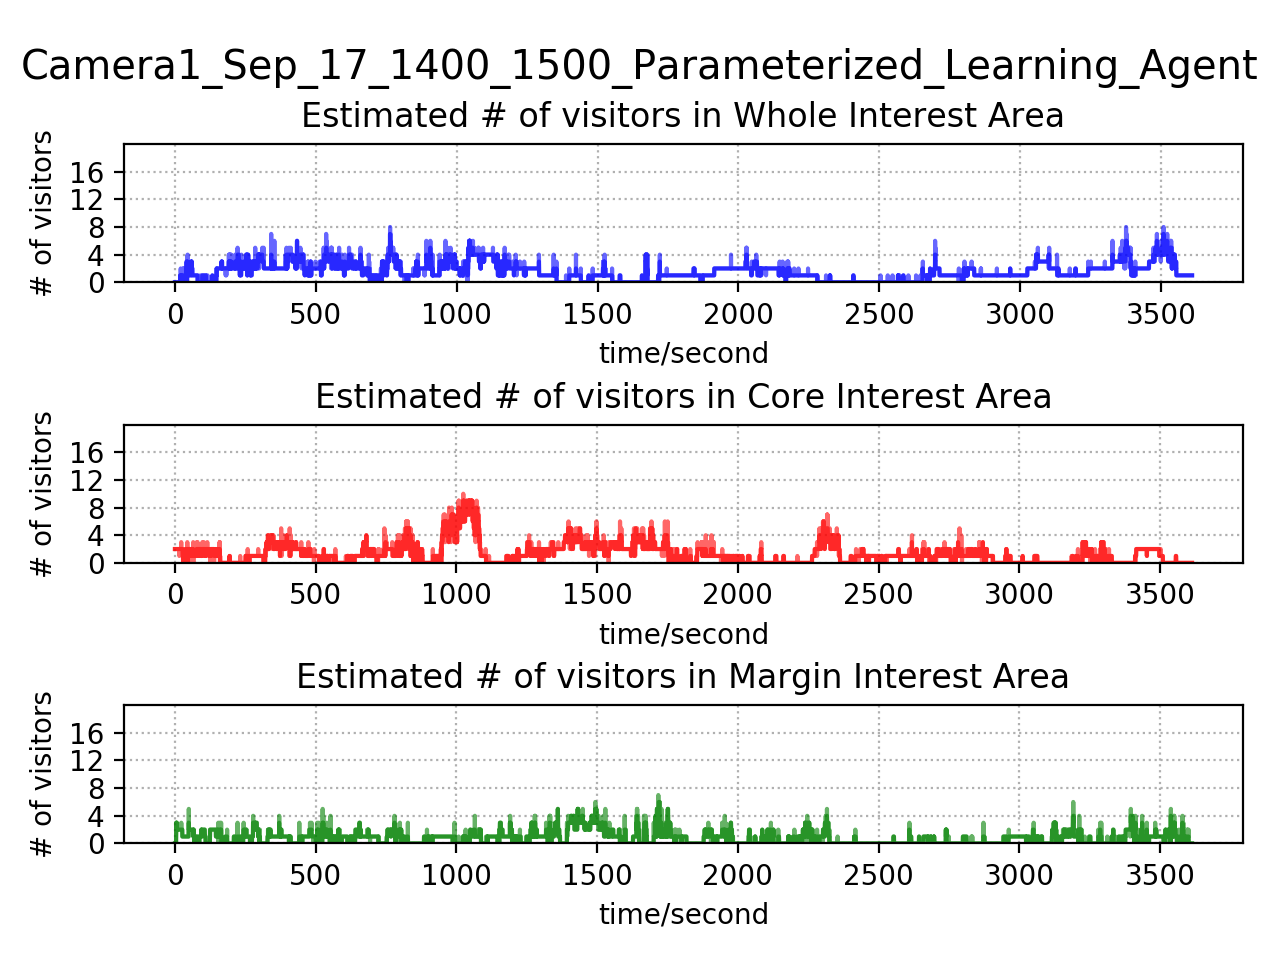

<IPython.core.display.Javascript object>


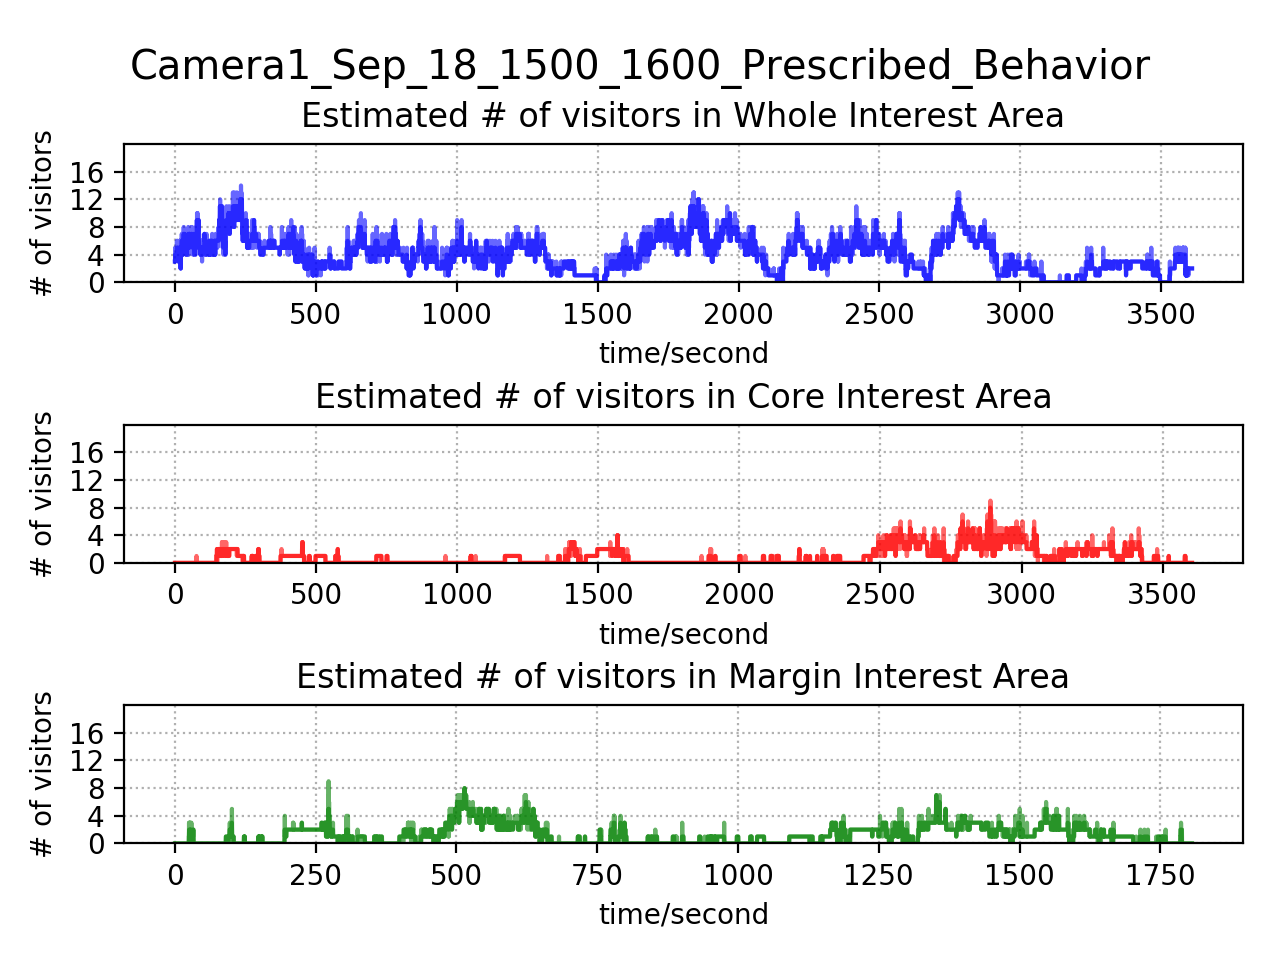

<IPython.core.display.Javascript object>


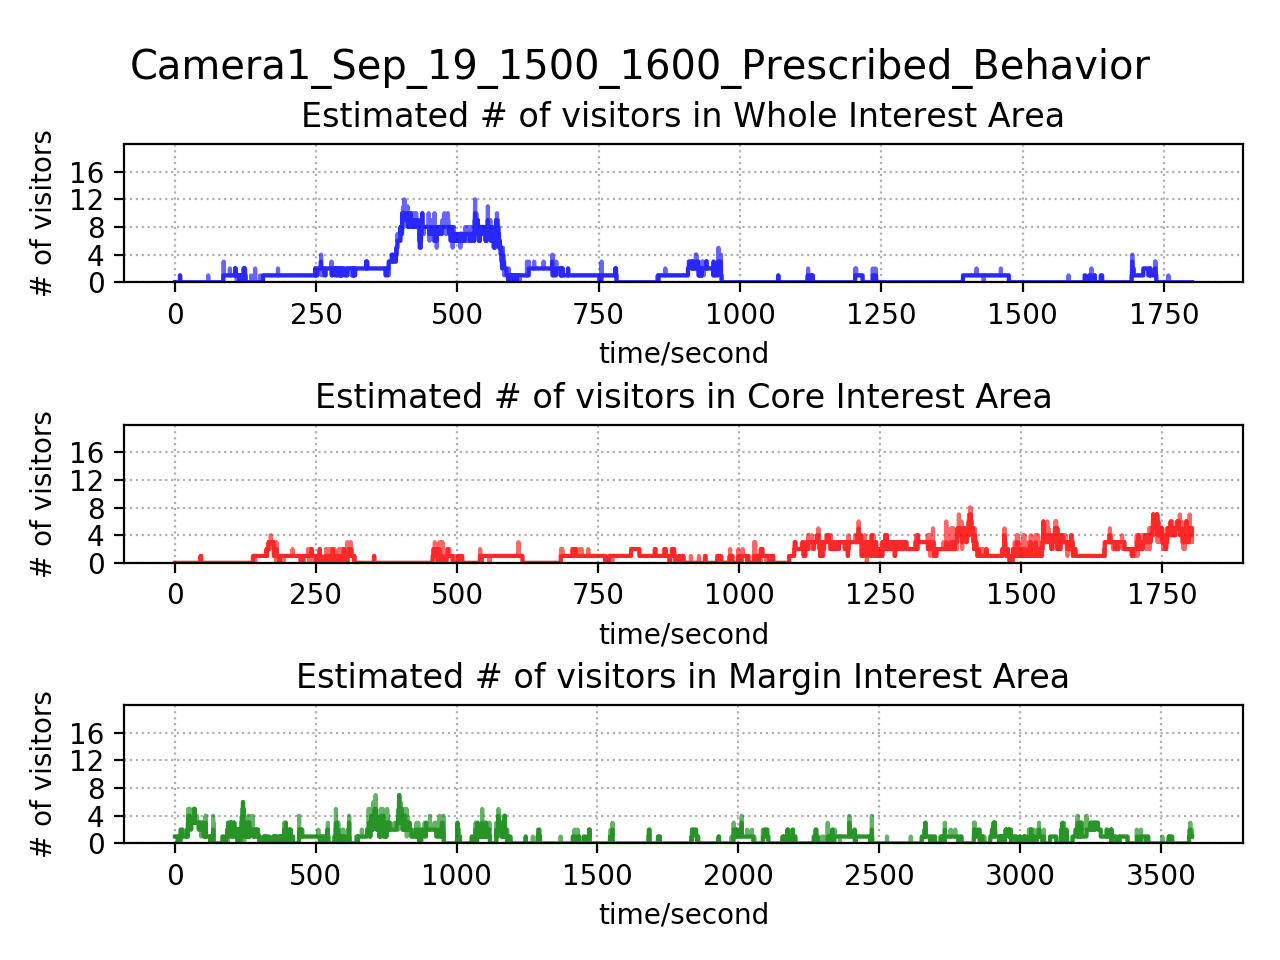

<IPython.core.display.Javascript object>


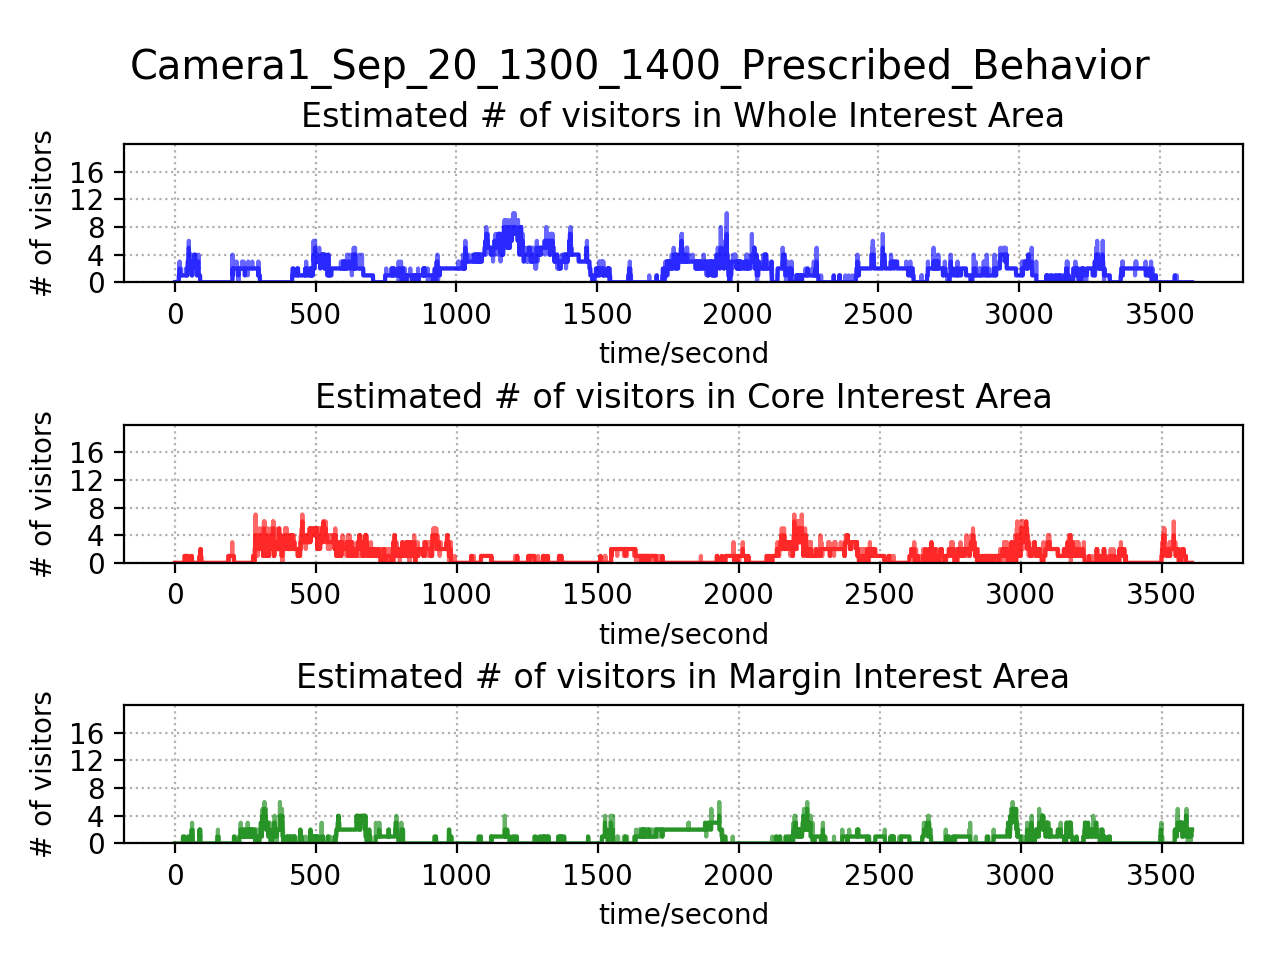

<IPython.core.display.Javascript object>


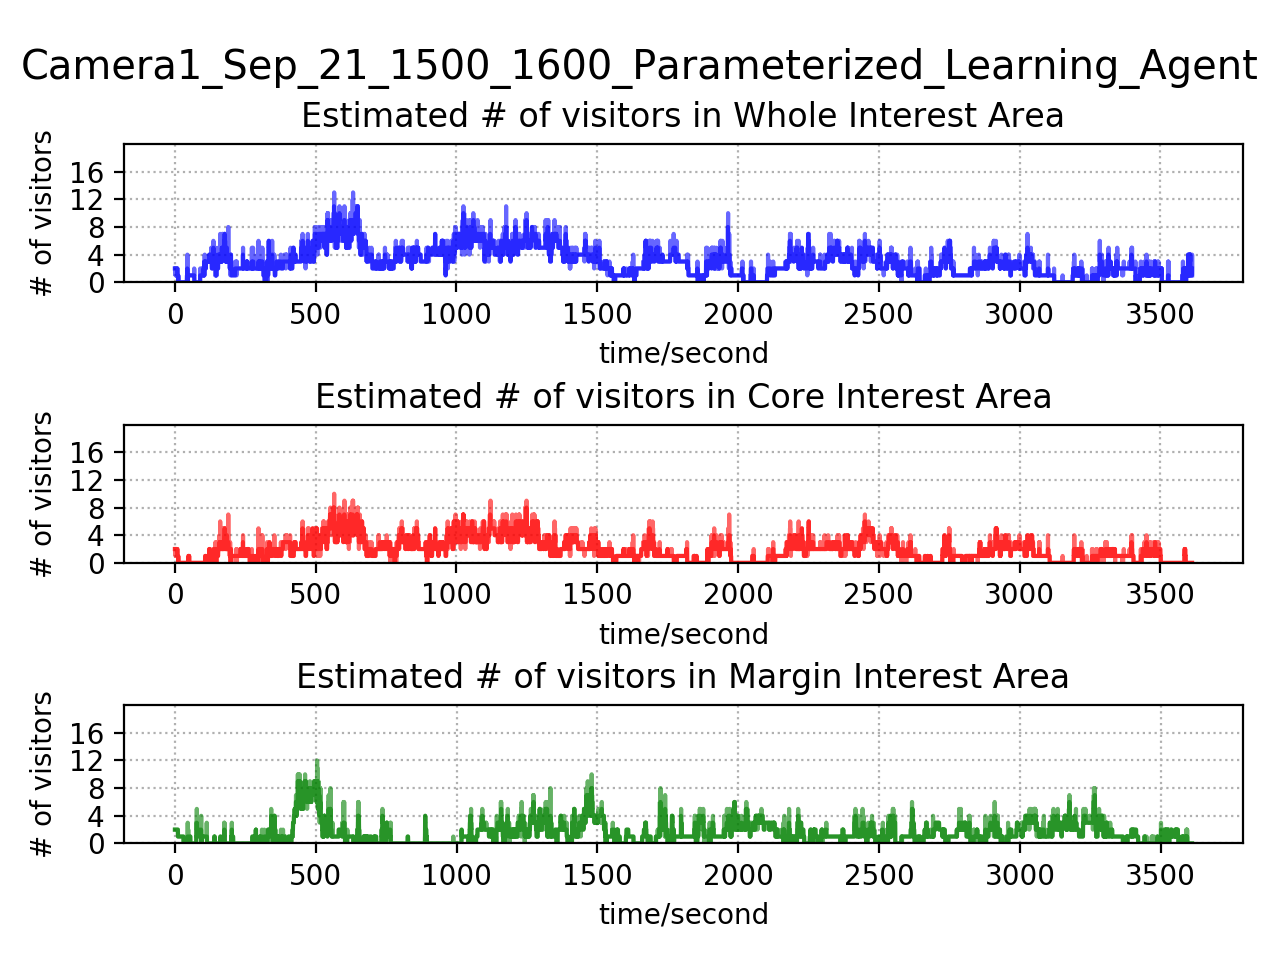

<IPython.core.display.Javascript object>


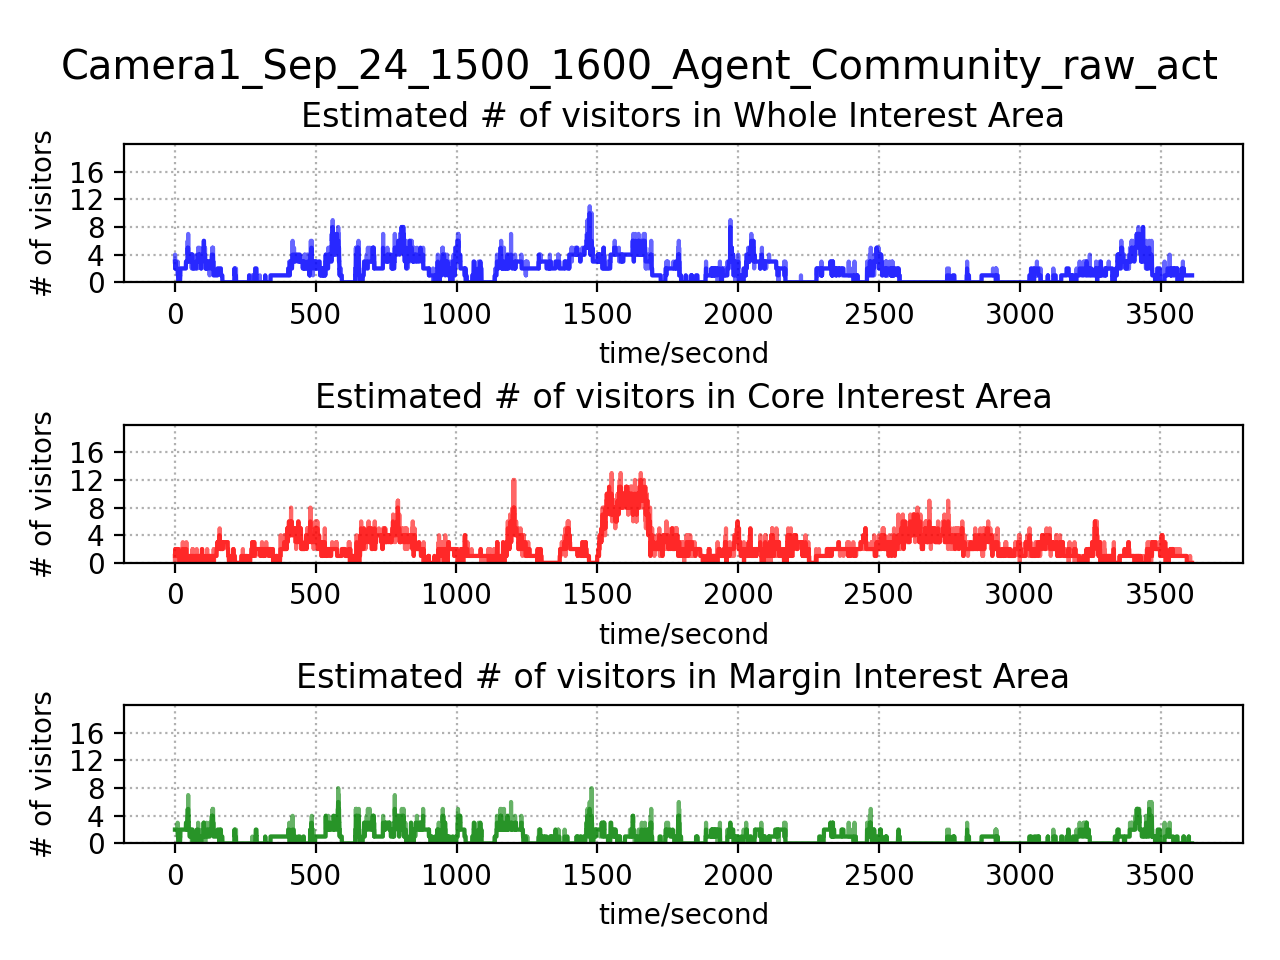

<IPython.core.display.Javascript object>


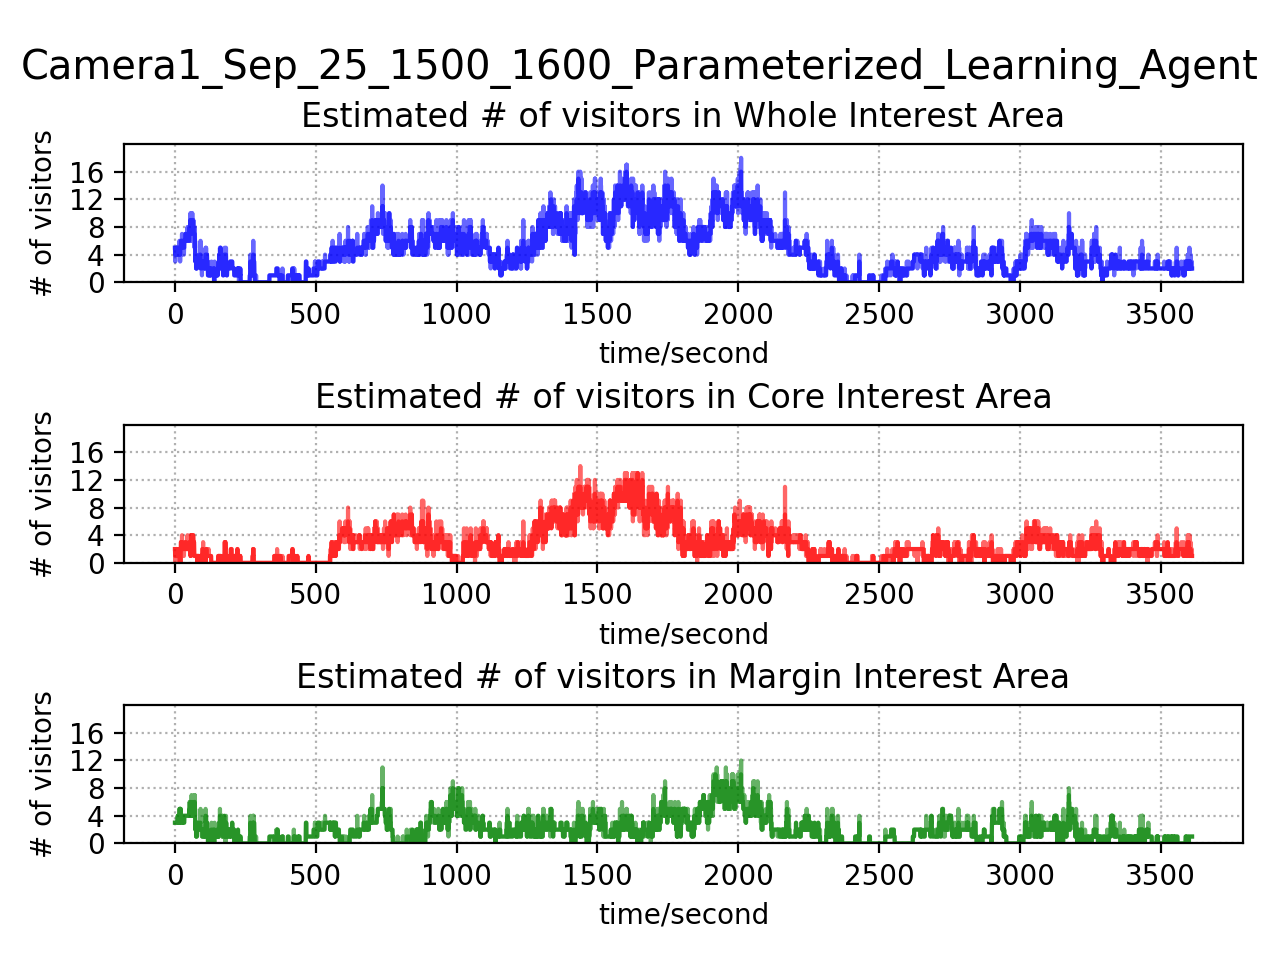

<IPython.core.display.Javascript object>


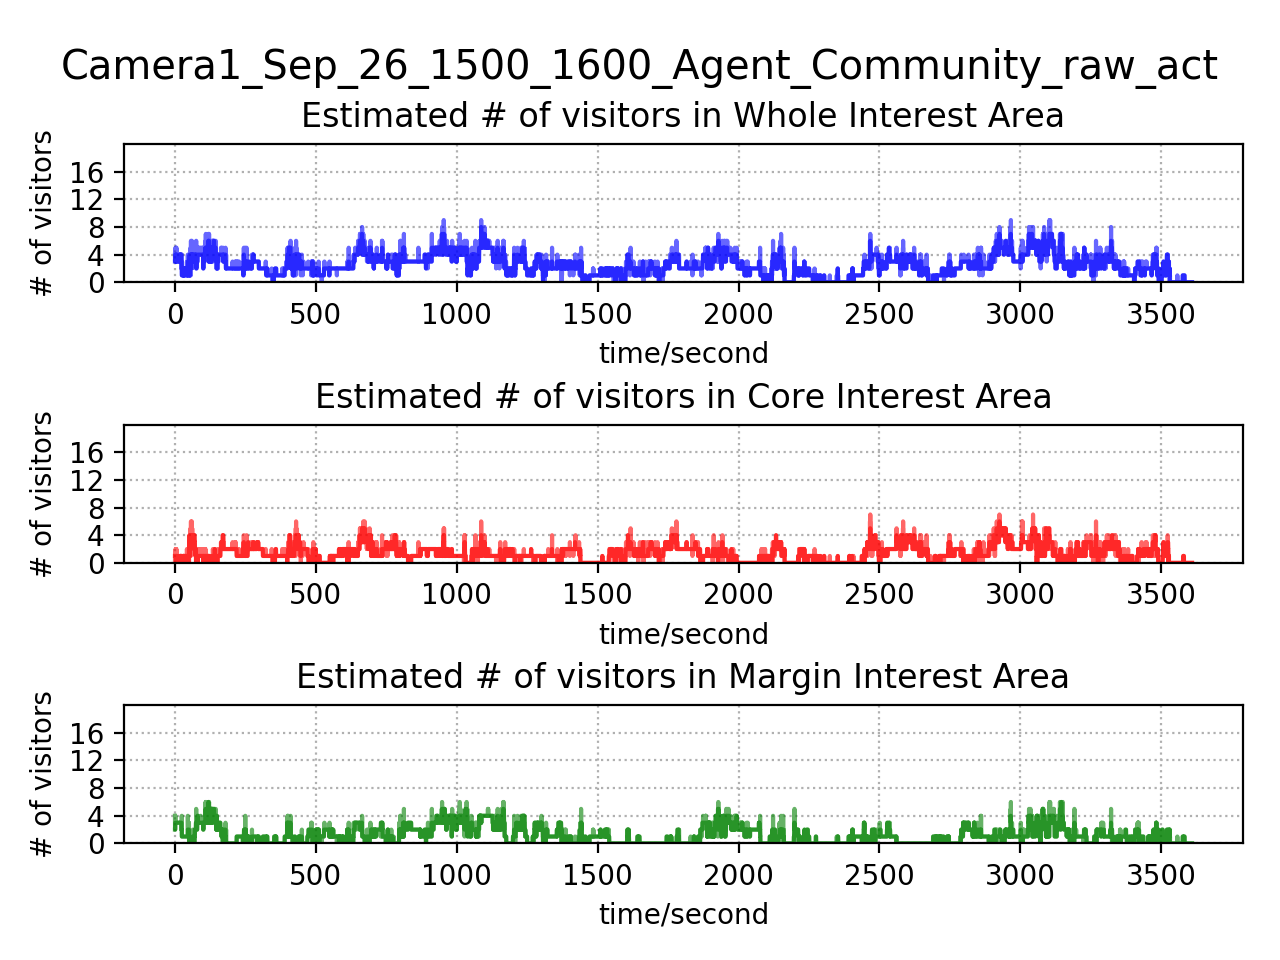

<IPython.core.display.Javascript object>


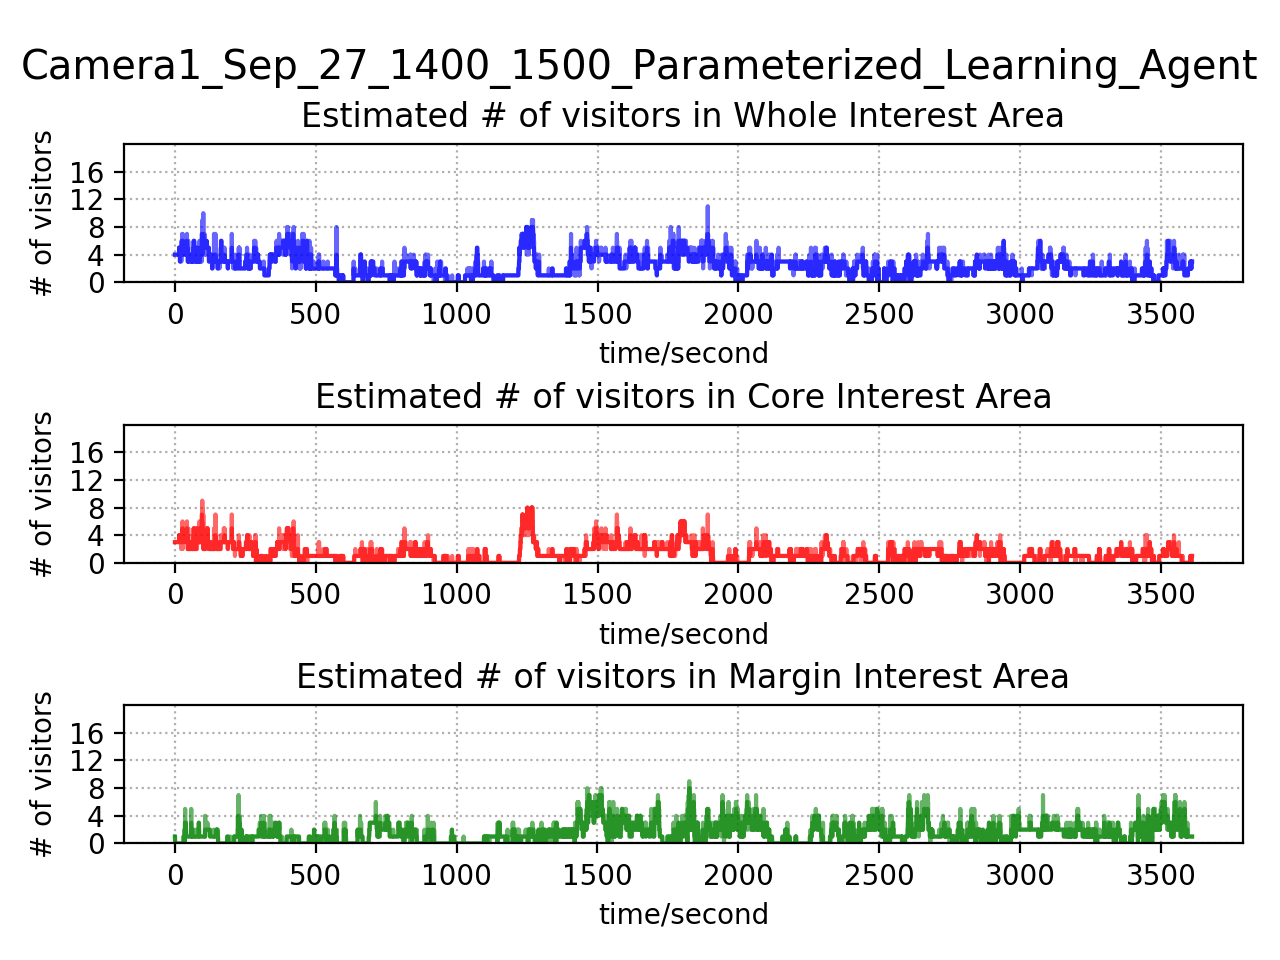

<IPython.core.display.Javascript object>


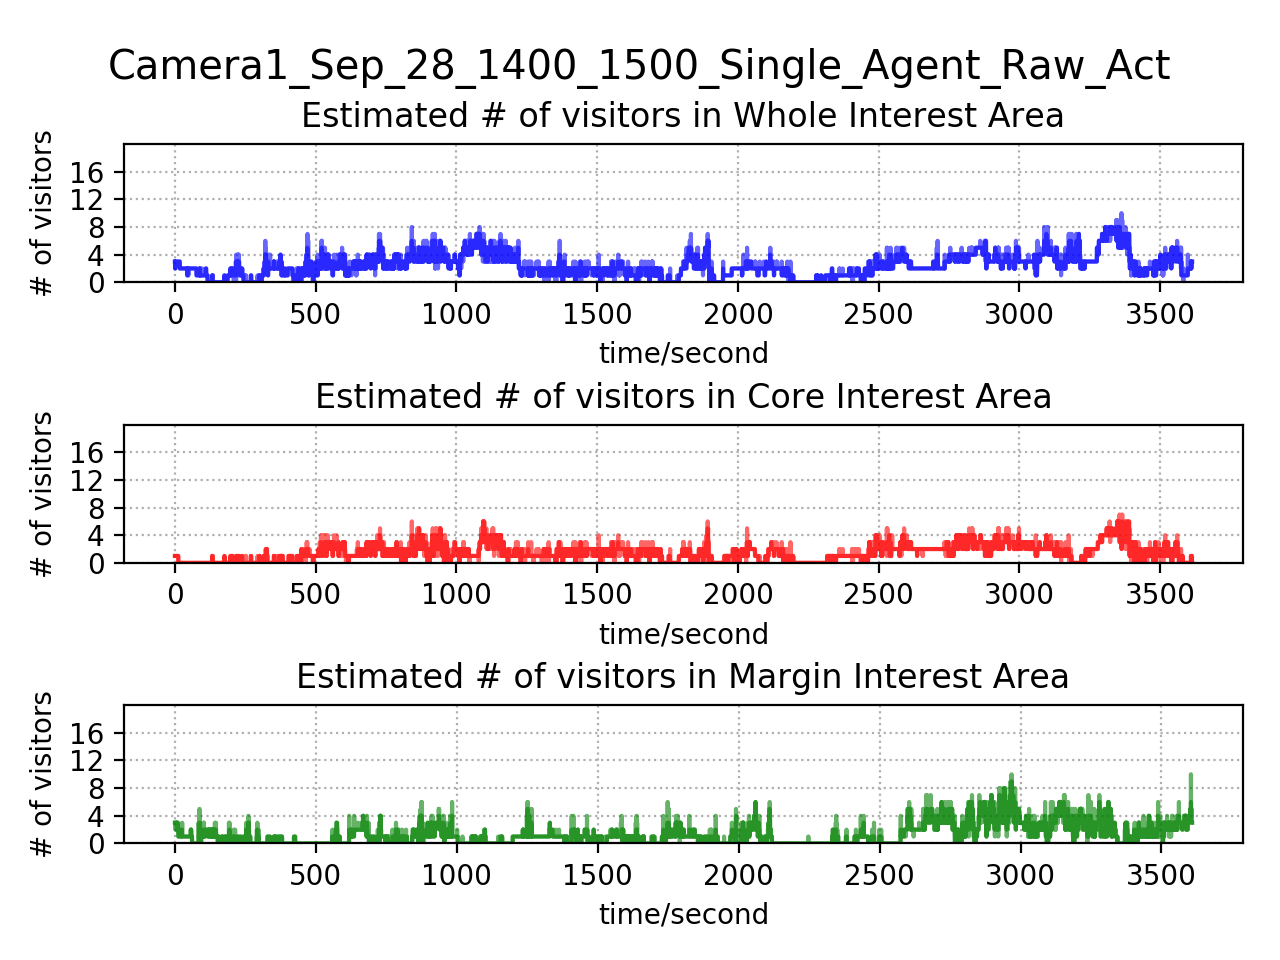

In [4]:
for subdir in occupancy_subdir_camera1:
    files = glob.glob(os.path.join(occupancy_dir_camera1, subdir, '*.csv'))
    for f in files:
        if 'whole' in f:
            occupancy_whole = pd.read_csv(f)
        if 'core' in f:
            occupancy_core = pd.read_csv(f)
        if 'margin' in f:
            occupancy_margin = pd.read_csv(f)
    info = f.split('/')[2].split('.csv')[0]
    subplot_estimated_occupancy(occupancy_whole, occupancy_core, occupancy_margin, info)    
    

### Camera2

<IPython.core.display.Javascript object>


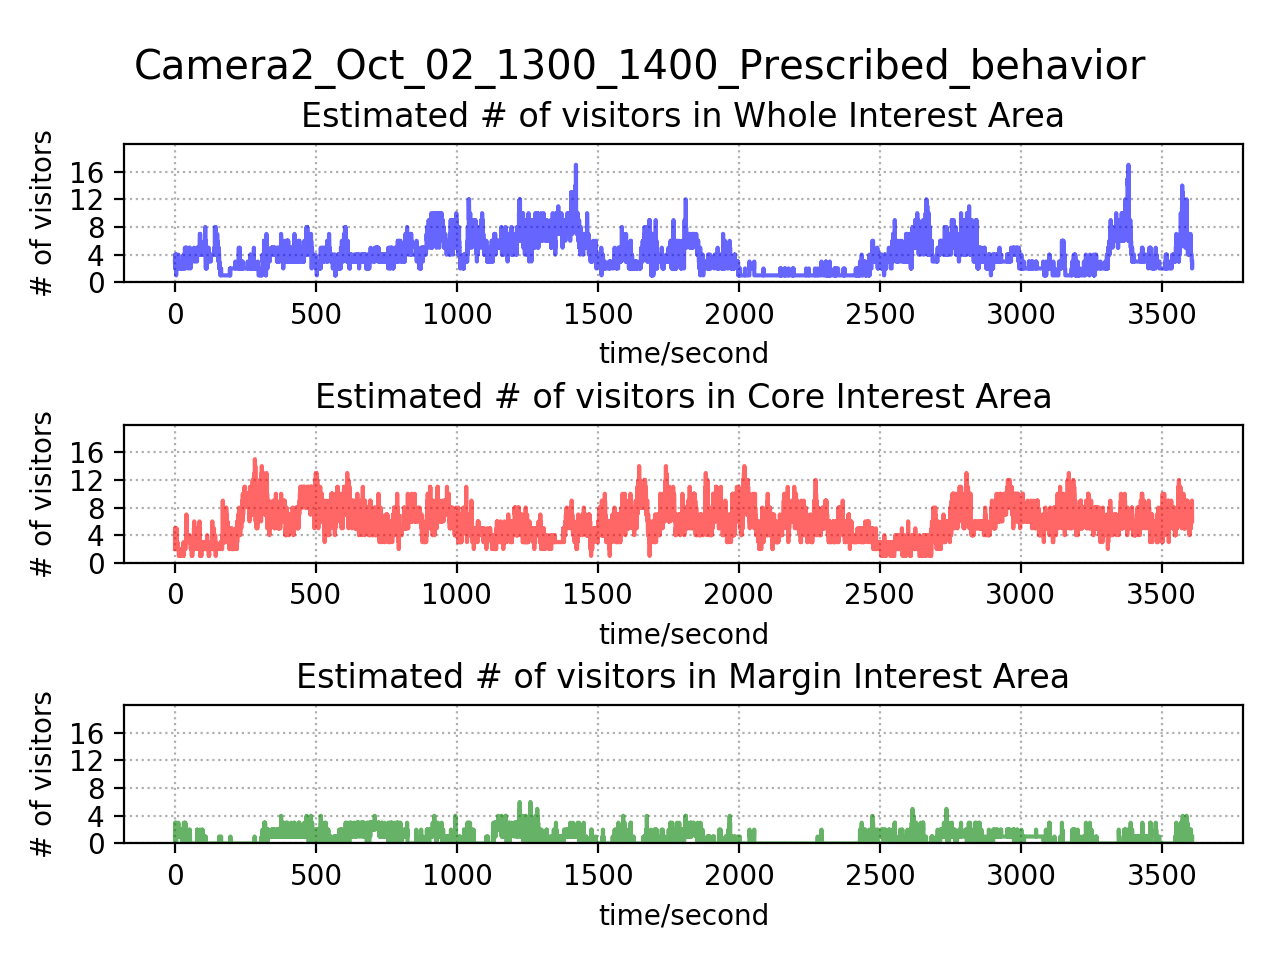

<IPython.core.display.Javascript object>


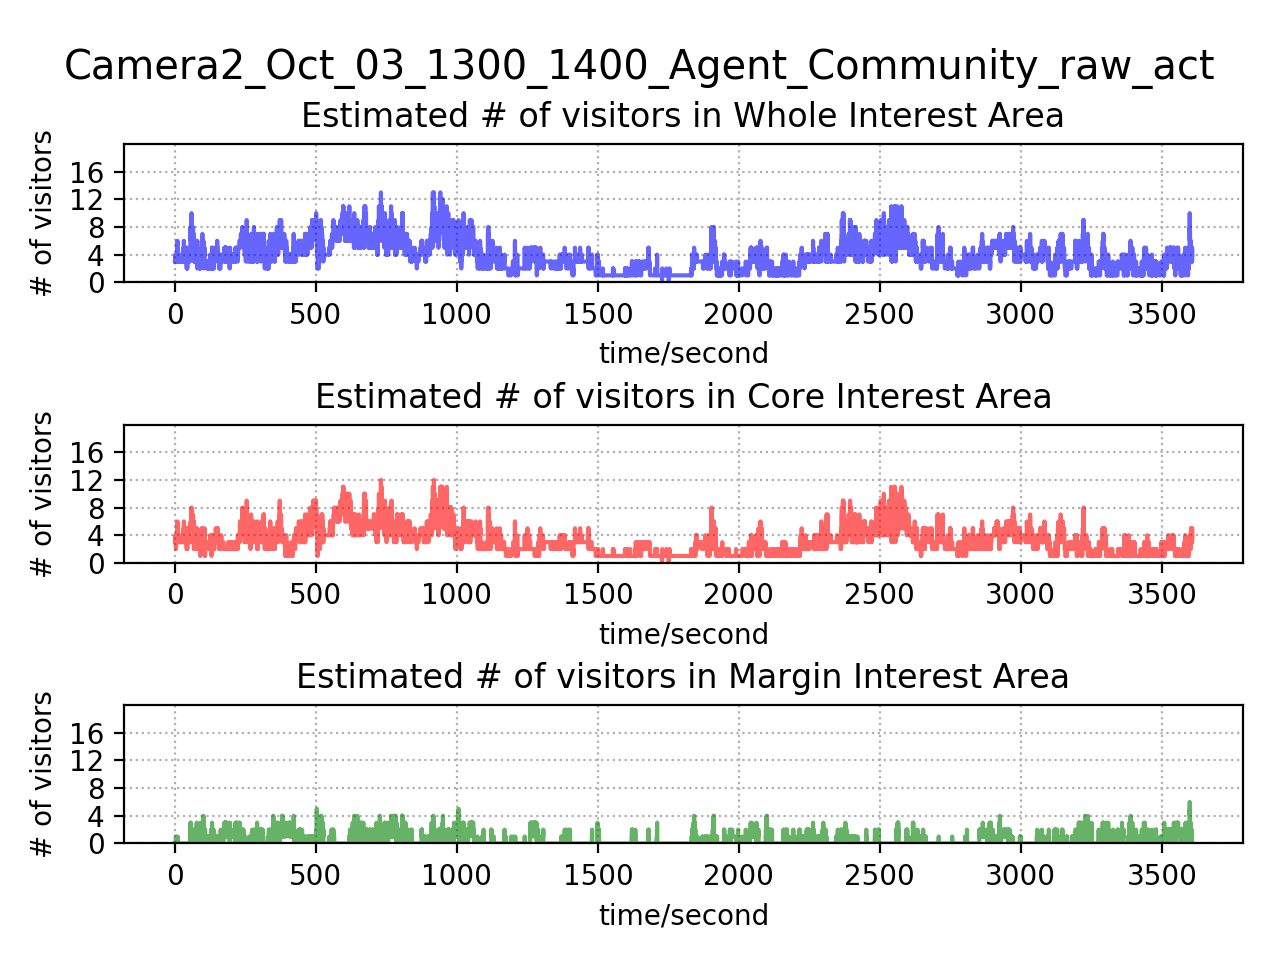

<IPython.core.display.Javascript object>


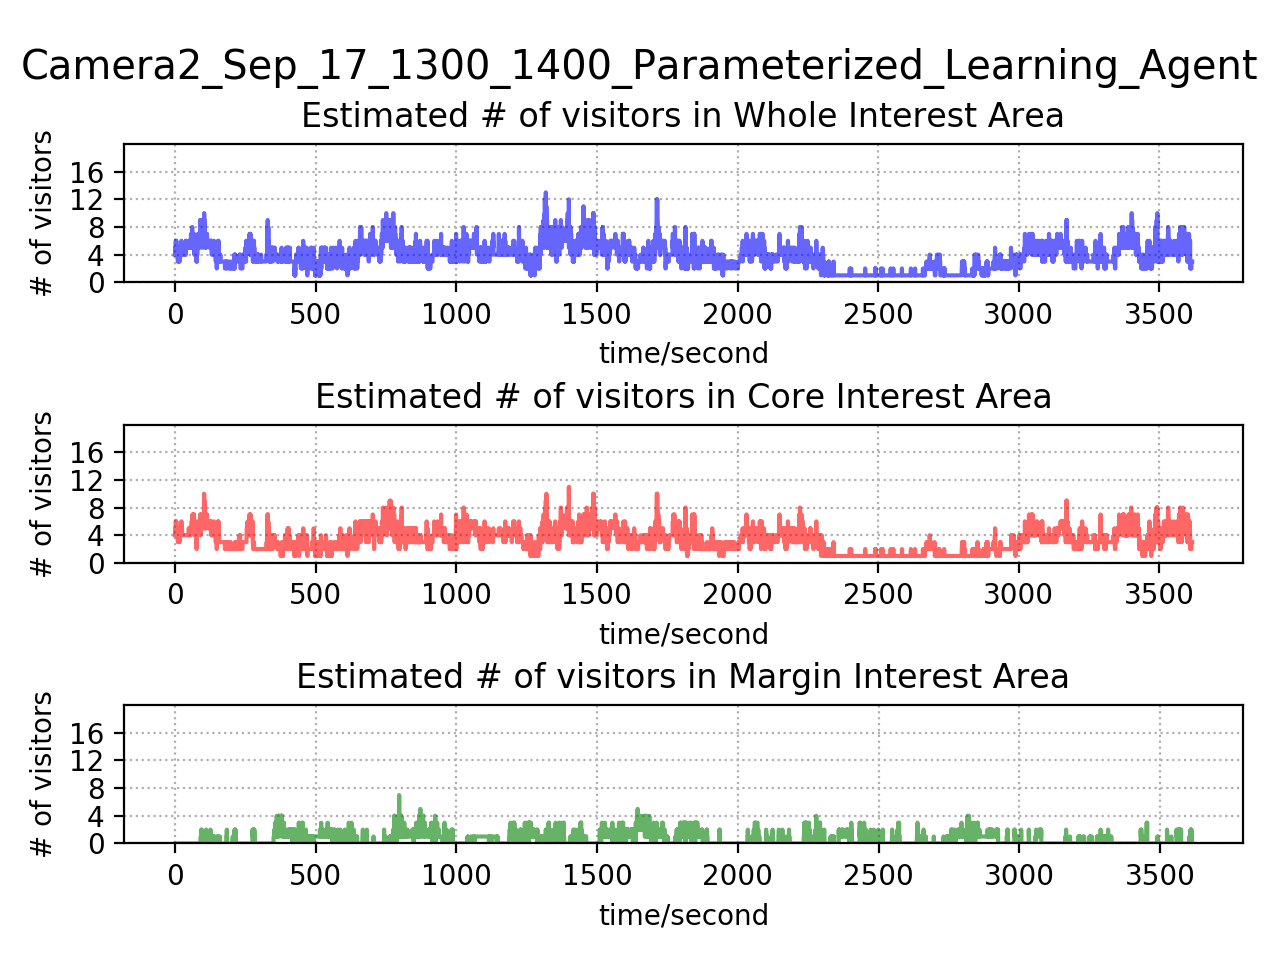

<IPython.core.display.Javascript object>


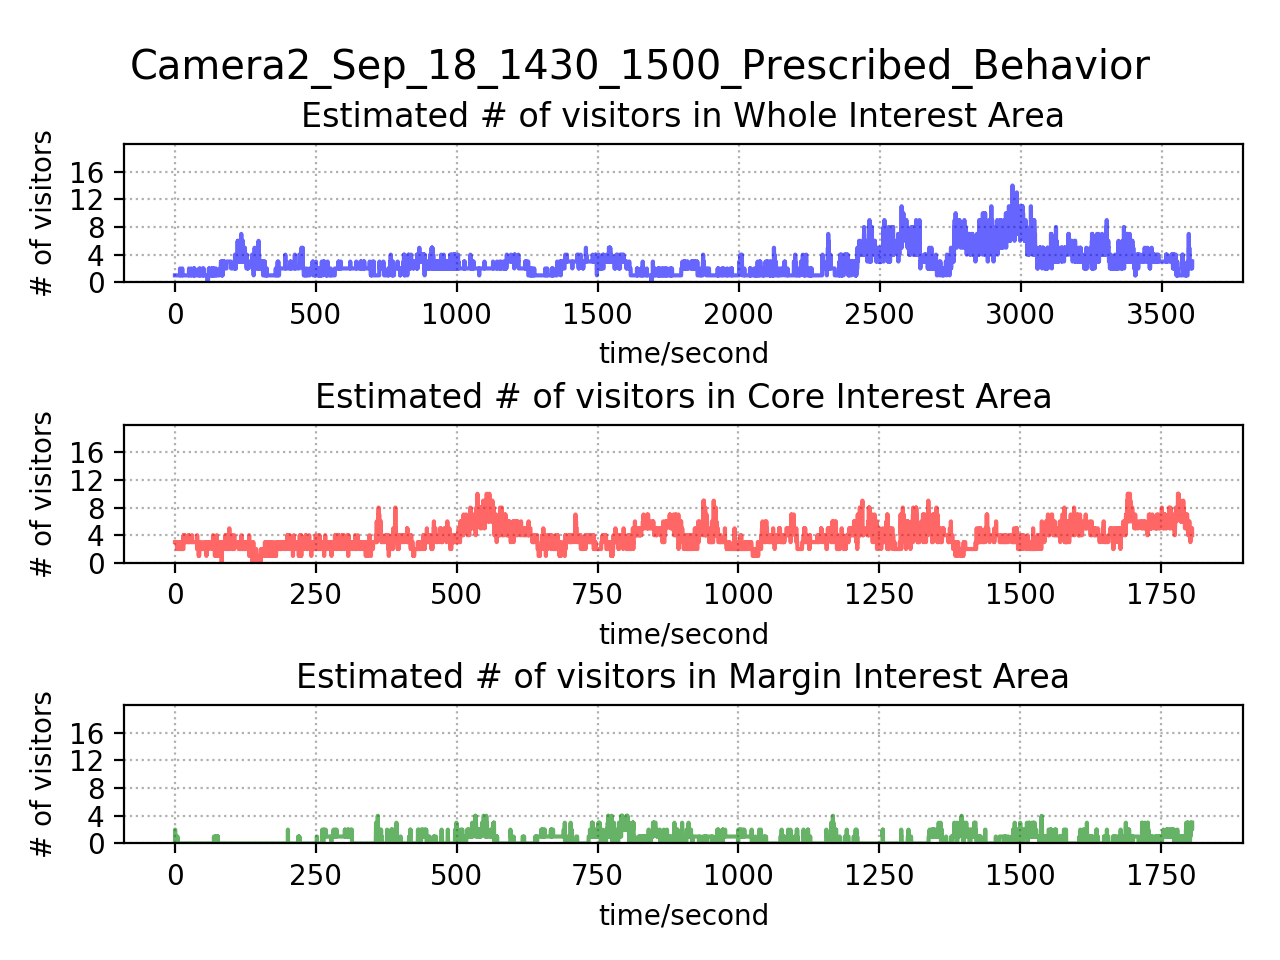

<IPython.core.display.Javascript object>


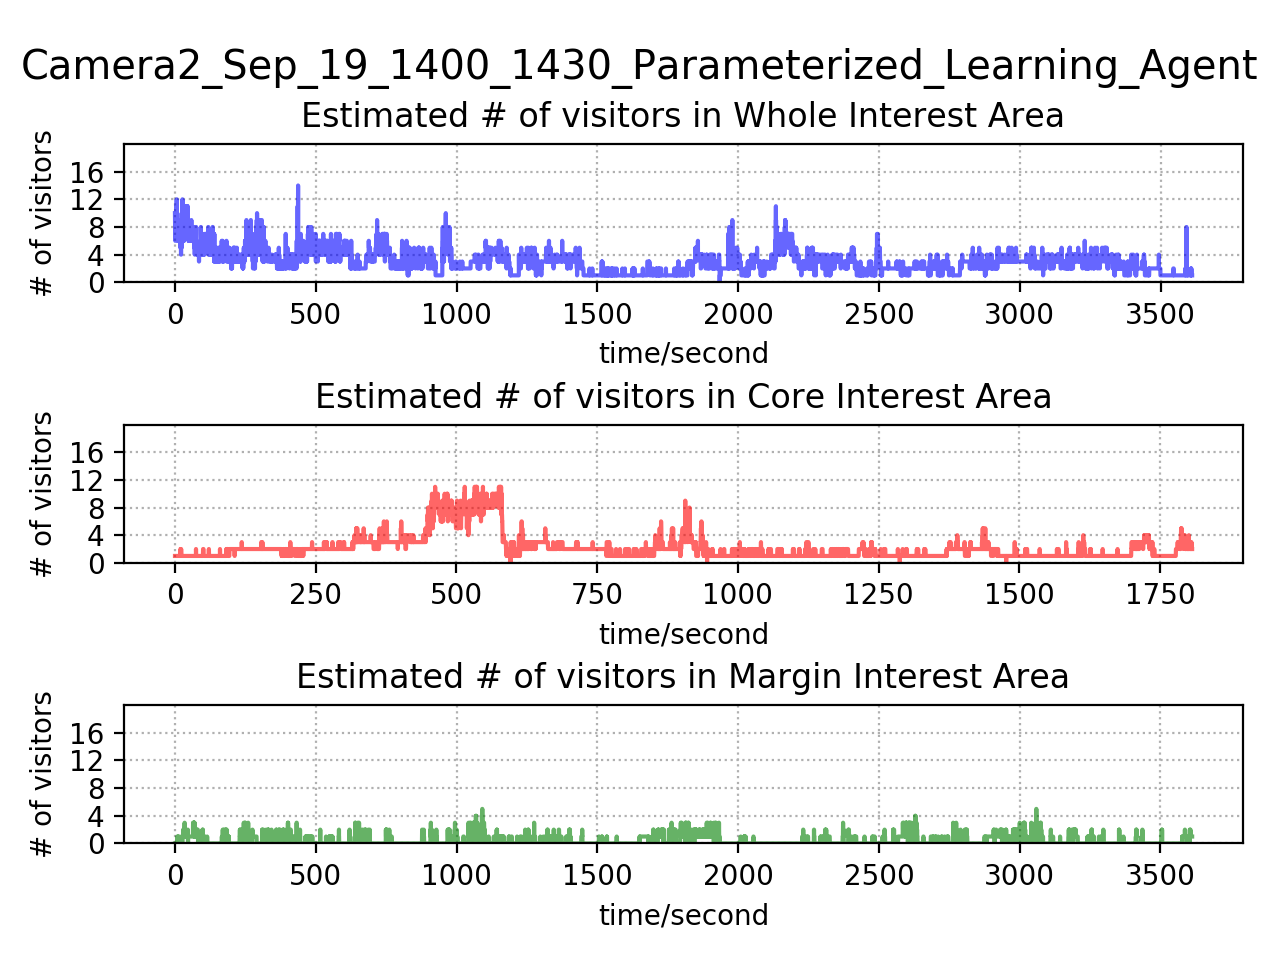

<IPython.core.display.Javascript object>


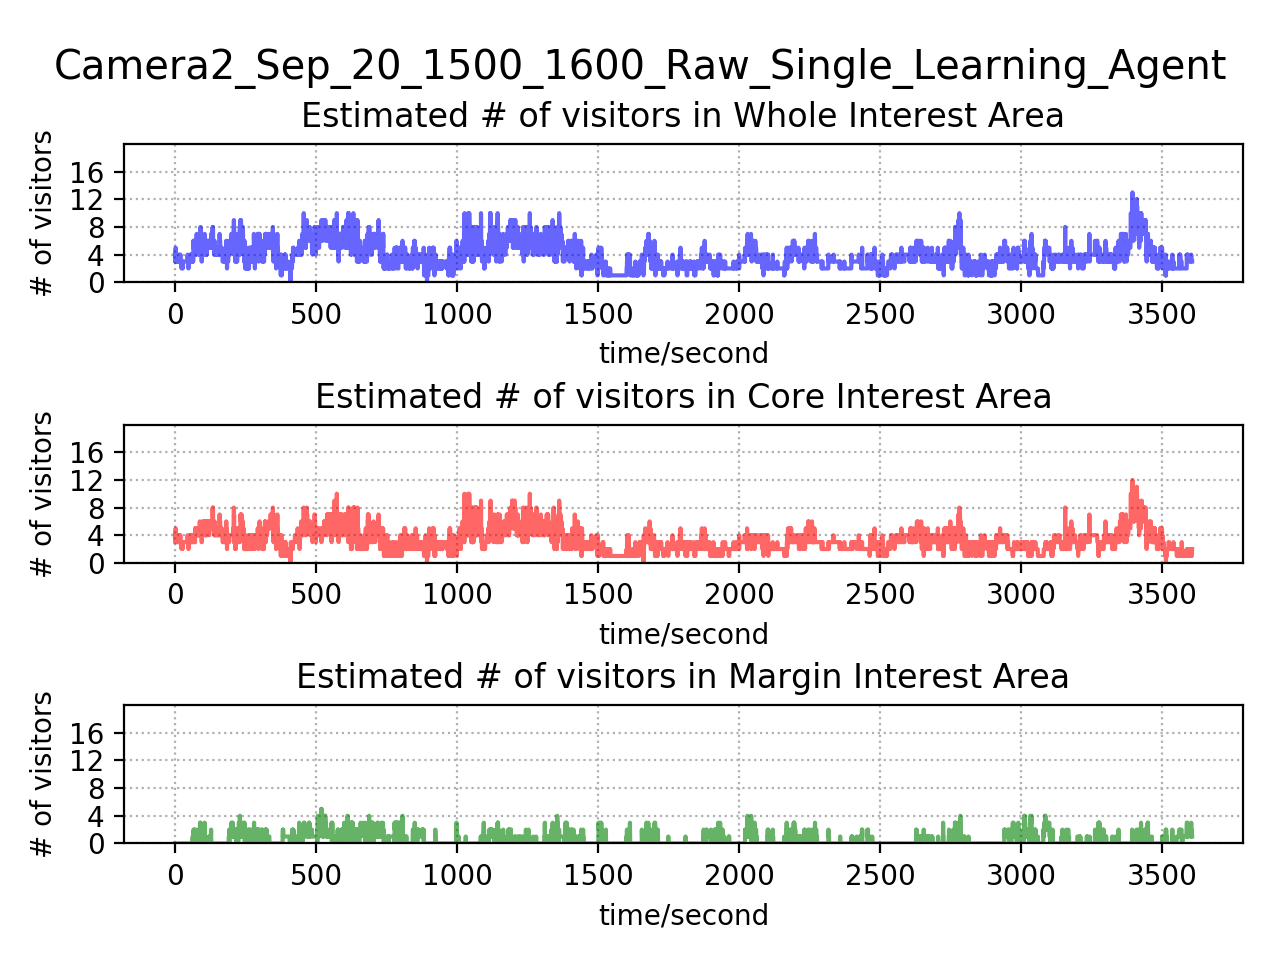

/Users/jack.lingheng.meng/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


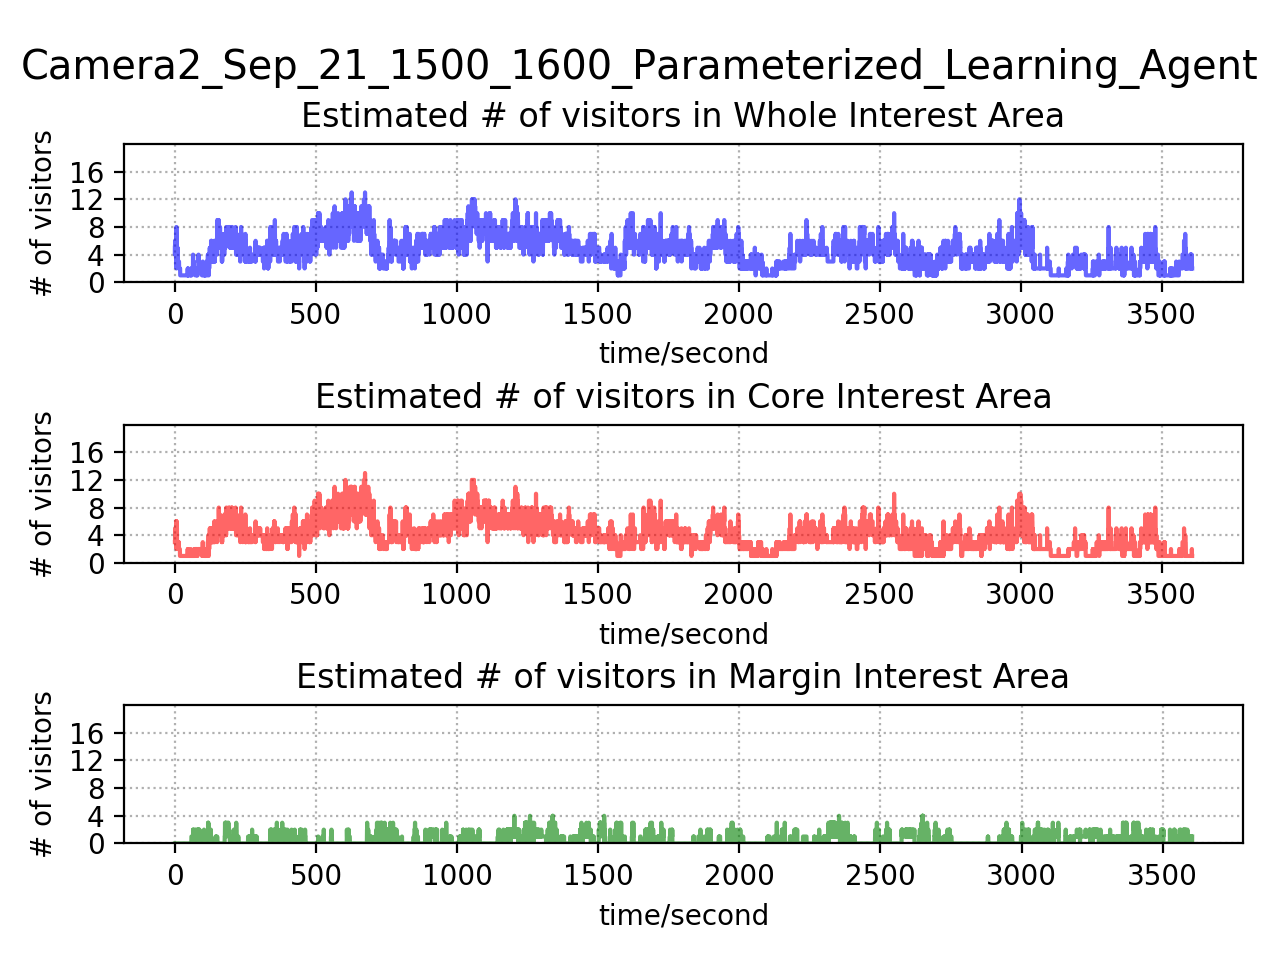

<IPython.core.display.Javascript object>


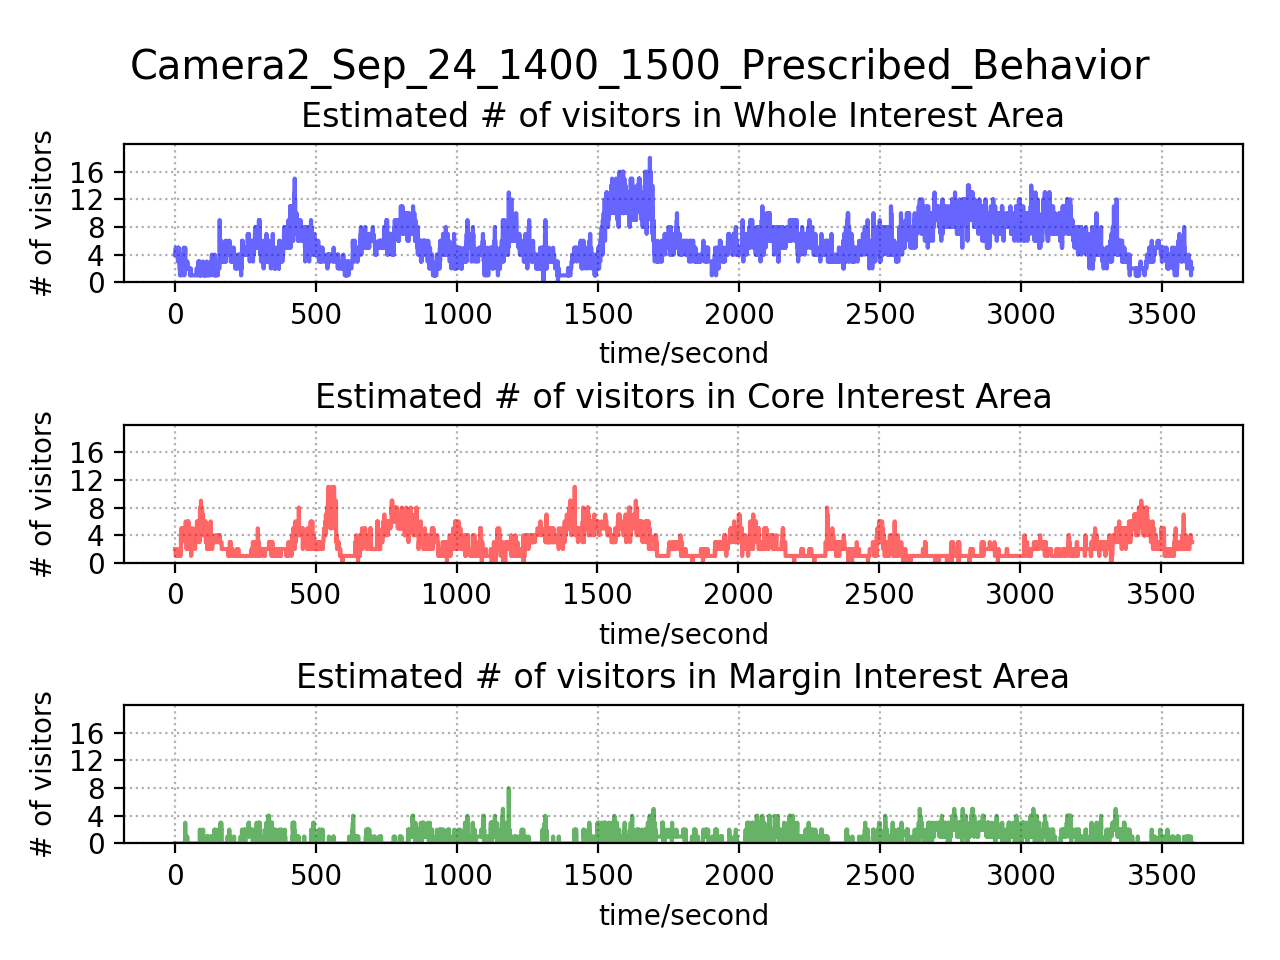

<IPython.core.display.Javascript object>


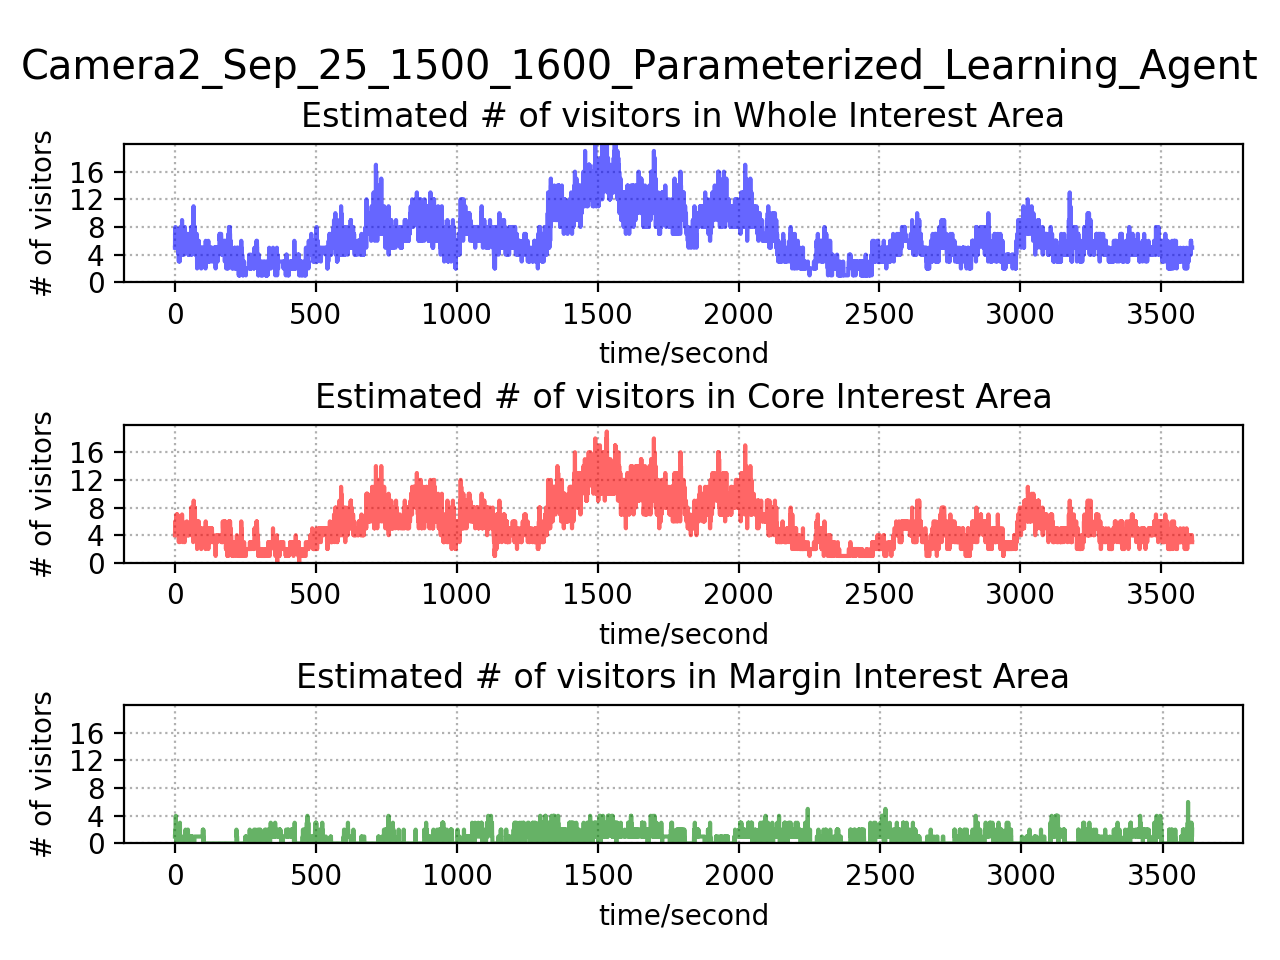

<IPython.core.display.Javascript object>


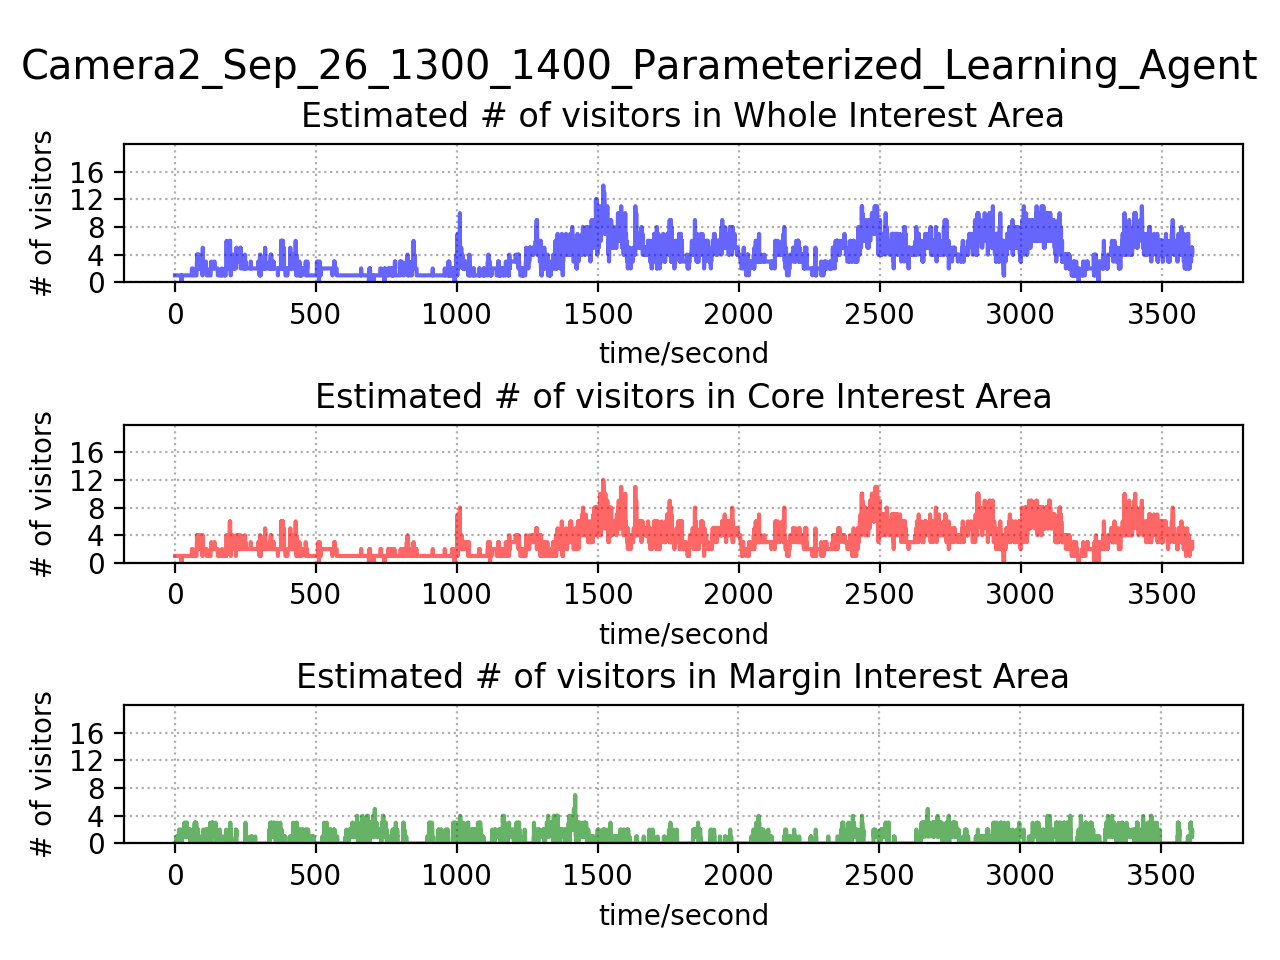

<IPython.core.display.Javascript object>


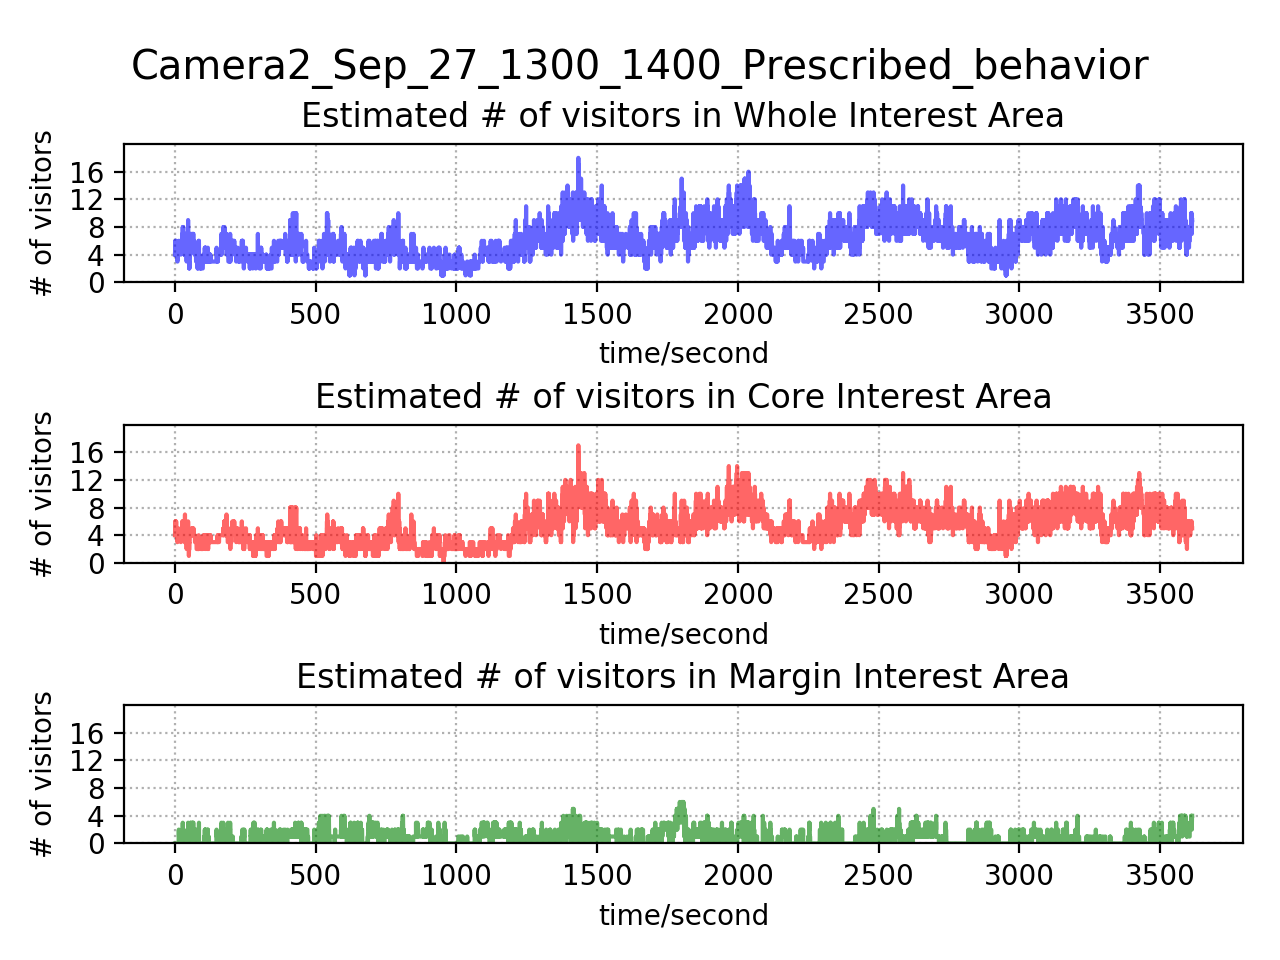

<IPython.core.display.Javascript object>


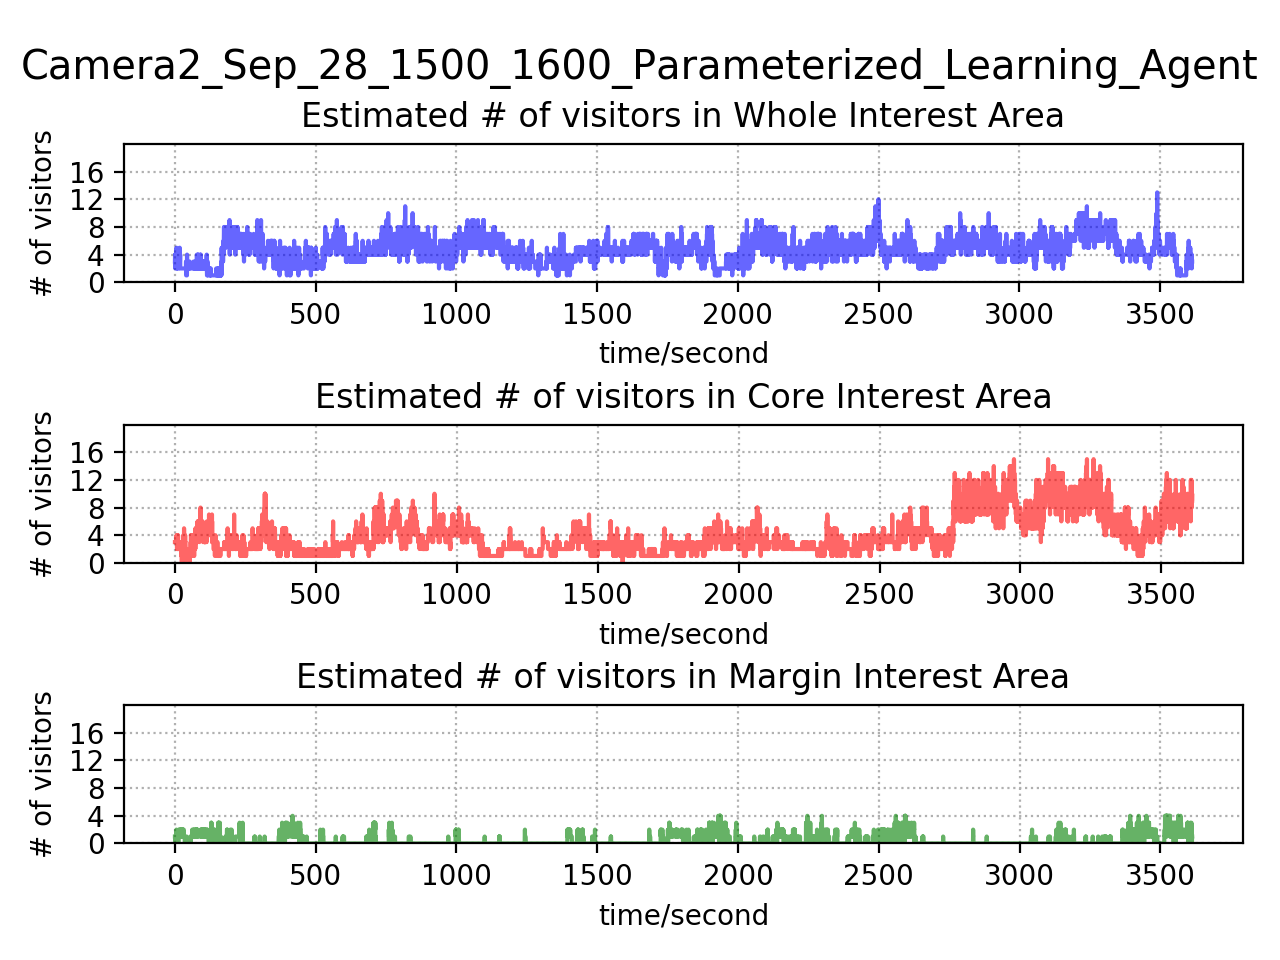

In [5]:
for subdir in occupancy_subdir_camera2:
    files = glob.glob(os.path.join(occupancy_dir_camera2, subdir, '*.csv'))
    for f in files:
        if 'whole' in f:
            occupancy_whole = pd.read_csv(f)
        if 'core' in f:
            occupancy_core = pd.read_csv(f)
        if 'margin' in f:
            occupancy_margin = pd.read_csv(f)
    info = f.split('/')[2].split('.csv')[0]
    subplot_estimated_occupancy(occupancy_whole, occupancy_core, occupancy_margin, info)   

## Smooth
### Sliding Window Smoothing Method

In [6]:
def moving_smoothing(values, window_size, smooth_type='mode', stride = 1):
    """
    Smoothen estimated occupancy.
    Args:
        values (pandas.DataFrame): 
            values['Time']: time in millisecond
            values['Occupancy']: estimated # of visitors
        window_size(int): the size of sliding window
        smooth_type (string): 
            1. 'mode'
            2. 'mean'
            3. 'min'
            4. 'median'
        stride (int): the stride between two consecutive windows
    Returns:
        smooth_time (np.array): smooth time i.e. the max time in each window
        smooth_occupancy (np.array): smooth occupancy i.e. the mode occupancy in each window
    """
    group_time = []
    group_occupancy = []
    for i in range(0, math.ceil((len(values['Time'])-window_size+1)/stride)):
        group_time.append(values['Time'][i:i+window_size])
        group_occupancy.append(values['Occupancy'][i:i+window_size])
    
    smooth_time = []
    smooth_occupancy = []
    for i in range(len(group_time)):
        smooth_time.append(min(group_time[i])) # max time in the group
        if smooth_type == 'mode':
            smooth_occupancy.append(mode(group_occupancy[i])[0][0]) # mode occupancy in the group
        elif smooth_type == 'mean':
            smooth_occupancy.append(int(np.round(np.mean(group_occupancy[i]))))
        elif smooth_type == 'min':
            smooth_occupancy.append(np.round(np.min(group_occupancy[i])))
        elif smooth_type == 'median':
            smooth_occupancy.append(np.round(np.median(group_occupancy[i])))
        else:
            print('Please choose a proper smooth_type.')
    smooth_values = pd.DataFrame(data={'Time': np.array(smooth_time),
                                       'Occupancy': np.array(smooth_occupancy,dtype=int)})
    return smooth_values#np.array(smooth_time), np.array(smooth_occupancy)

In [7]:
window_size = 5
smooth_type='mean'
stride = 1

### Camera1

In [8]:

for subdir in occupancy_subdir_camera1:
    files = glob.glob(os.path.join(occupancy_dir_camera1, subdir, '*.csv'))
    for f in files:
        if 'whole' in f:
            occupancy_whole = pd.read_csv(f)
        if 'core' in f:
            occupancy_core = pd.read_csv(f)
        if 'margin' in f:
            occupancy_margin = pd.read_csv(f)
    # Smoothen
    smooth_occupancy_whole = moving_smoothing(occupancy_whole, window_size, smooth_type)
    smooth_occupancy_core = moving_smoothing(occupancy_core, window_size, smooth_type)
    smooth_occupancy_margin = moving_smoothing(occupancy_margin, window_size, smooth_type)
    
    info = f.split('/')[2].split('.csv')[0]
    subplot_estimated_occupancy(smooth_occupancy_whole, smooth_occupancy_core, smooth_occupancy_margin, info) 

/Users/jack.lingheng.meng/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


### Camera2

/Users/jack.lingheng.meng/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:528: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<IPython.core.display.Javascript object>


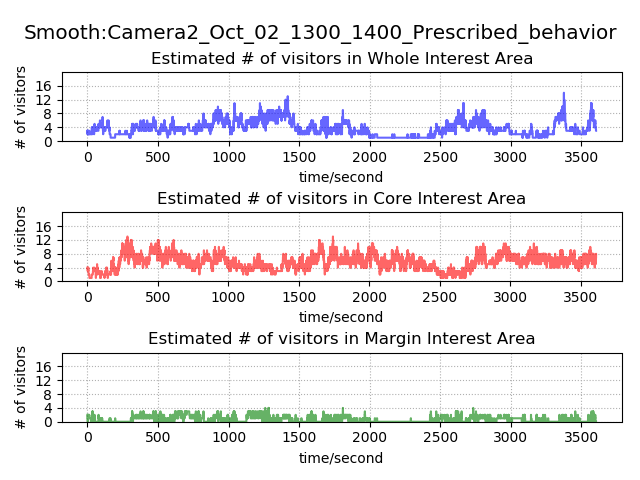

<IPython.core.display.Javascript object>


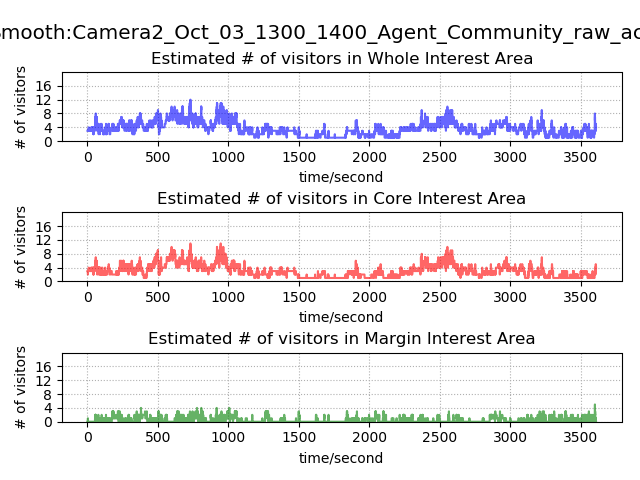

<IPython.core.display.Javascript object>


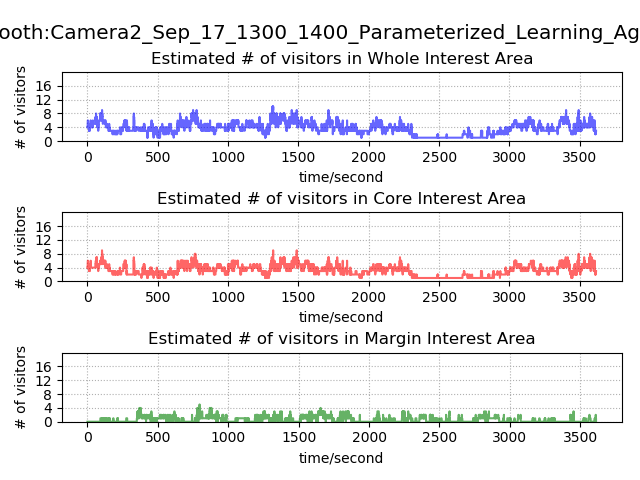

<IPython.core.display.Javascript object>


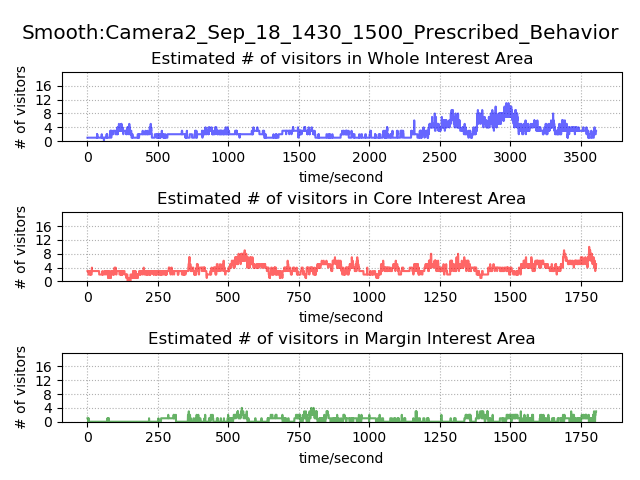

<IPython.core.display.Javascript object>


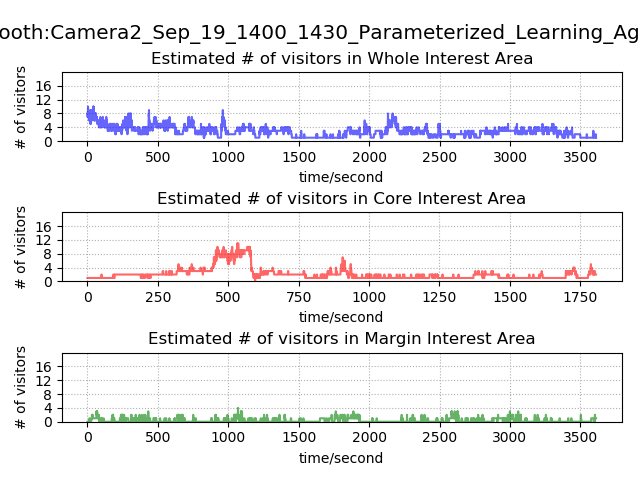

<IPython.core.display.Javascript object>


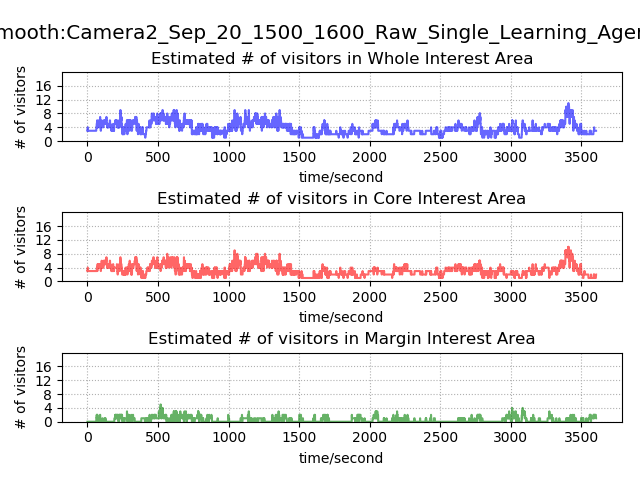

<IPython.core.display.Javascript object>


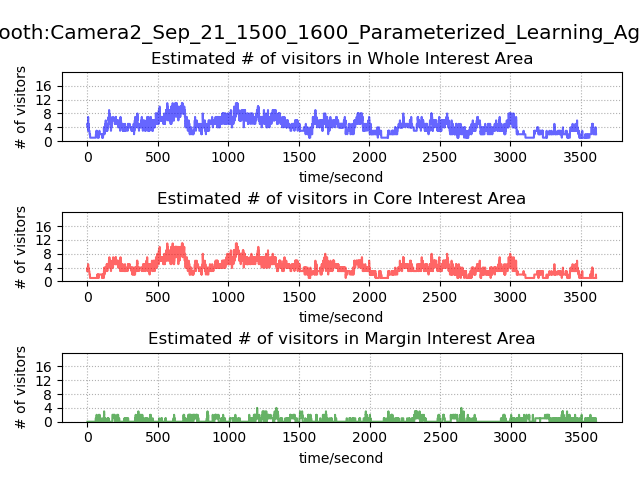

<IPython.core.display.Javascript object>


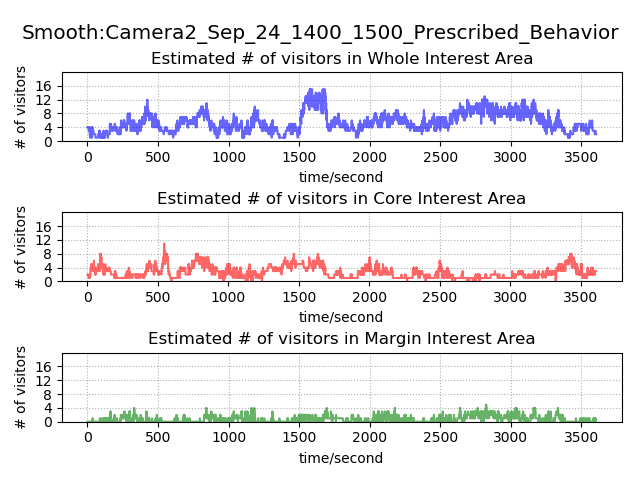

<IPython.core.display.Javascript object>


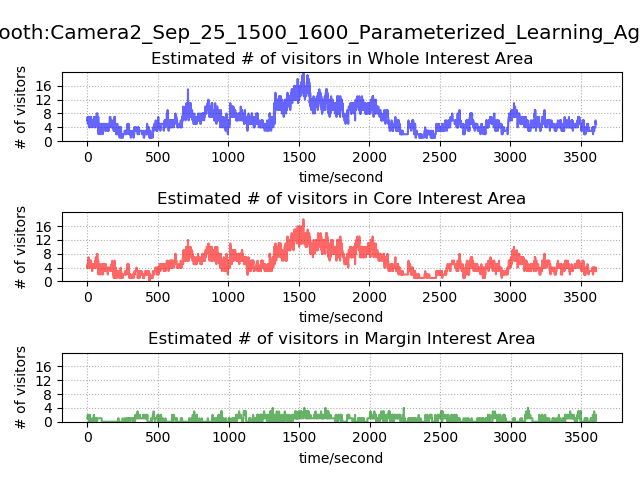

<IPython.core.display.Javascript object>


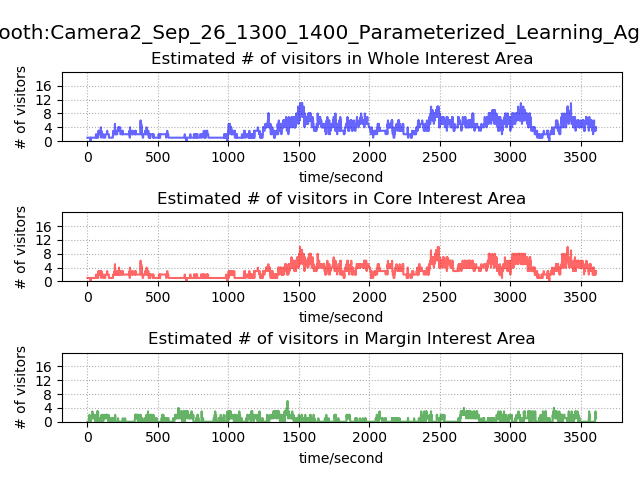

<IPython.core.display.Javascript object>


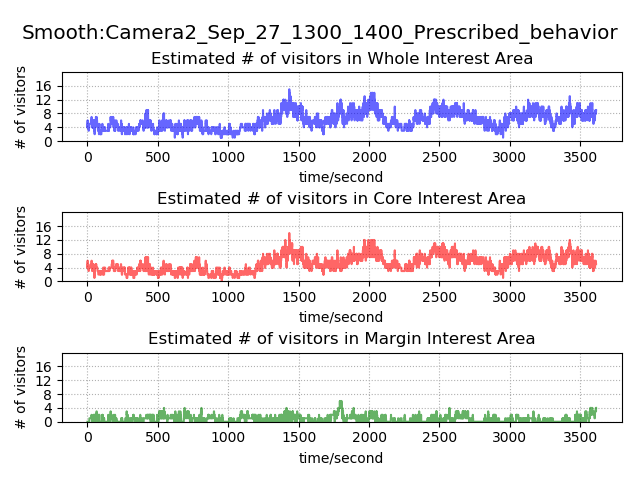

<IPython.core.display.Javascript object>


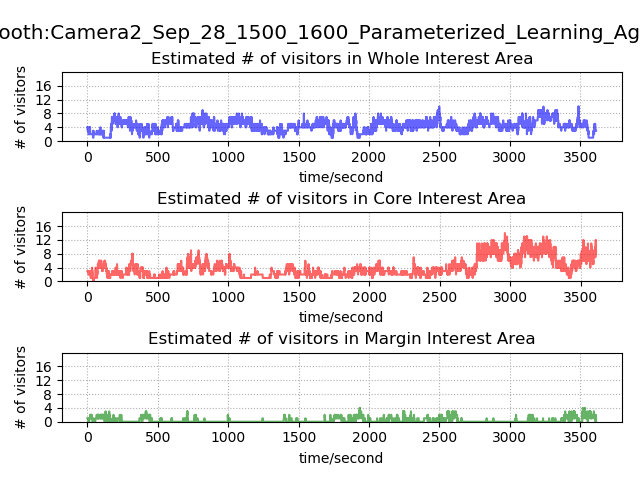

In [9]:

for subdir in occupancy_subdir_camera2:
    files = glob.glob(os.path.join(occupancy_dir_camera2, subdir, '*.csv'))
    for f in files:
        if 'whole' in f:
            occupancy_whole = pd.read_csv(f)
        if 'core' in f:
            occupancy_core = pd.read_csv(f)
        if 'margin' in f:
            occupancy_margin = pd.read_csv(f)
    # Smoothen
    smooth_occupancy_whole = moving_smoothing(occupancy_whole, window_size, smooth_type)
    smooth_occupancy_core = moving_smoothing(occupancy_core, window_size, smooth_type)
    smooth_occupancy_margin = moving_smoothing(occupancy_margin, window_size, smooth_type)
    
    info = f.split('/')[2].split('.csv')[0]
    info = 'Smooth:{}'.format(info)
    subplot_estimated_occupancy(smooth_occupancy_whole, smooth_occupancy_core, smooth_occupancy_margin, info) 